In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from distfit import distfit

In [2]:
# Let's take a first look of the dataset

df = pd.read_csv('sloth_data.csv')
df

Unnamed: 0  claw_length_cm             endangered  size_cm      specie  \
0              0           6.825  critically_endangered   52.004  three_toed   
1              1           8.260  critically_endangered   50.082  three_toed   
2              2           8.662  critically_endangered   51.498  three_toed   
3              3           8.467  critically_endangered   50.122  three_toed   
4              4           7.104  critically_endangered   51.364  three_toed   
...          ...             ...                    ...      ...         ...   
4995        4995           3.919          least_concern   62.819    two_toed   
4996        4996           5.881          least_concern   63.150    two_toed   
4997        4997           4.941          least_concern   62.091    two_toed   
4998        4998           6.176          least_concern   62.039    two_toed   
4999        4999           3.494          least_concern   64.043    two_toed   

                    sub_specie  tail_length_cm  weight_kg  
0       Pygmy three-toed sloth           4.448      3.570  
1       Pygmy three-toed sloth           6.286      2.844  
2       Pygmy three-toed sloth           4.551      1.259  
3       Pygmy three-toed sloth           6.983      2.392  
4       Pygmy three-toed sloth           5.411      3.163  
...                        ...             ...        ...  
4995  Hoffman’s two-toed sloth           3.176      4.247  
4996  Hoffman’s two-toed sloth           1.535      4.056  
4997  Hoffman’s two-toed sloth           1.905      5.194  
4998  Hoffman’s two-toed sloth           1.164      5.035  
4999  Hoffman’s two-toed sloth           1.512      6.384  

[5000 rows x 8 columns]

In [3]:
# Drop the Unnamed: 0 column (same that index)

df = df.drop('Unnamed: 0', axis=1)

In [4]:
df.dtypes.value_counts()

float64    4
object     3
Name: count, dtype: int64

In [5]:
# Looking for NaN values 

df.isnull().any()

claw_length_cm    False
endangered        False
size_cm           False
specie            False
sub_specie        False
tail_length_cm    False
weight_kg         False
dtype: bool

In [6]:
# Some statistics values

df.describe(include='all')

claw_length_cm     endangered      size_cm      specie  \
count      5000.000000           5000  5000.000000        5000   
unique             NaN              3          NaN           2   
top                NaN  least_concern          NaN  three_toed   
freq               NaN           4390          NaN        2662   
mean          7.423503            NaN    60.399852         NaN   
std           1.520533            NaN     5.929968         NaN   
min           1.748000            NaN    46.928000         NaN   
25%           6.383750            NaN    59.904750         NaN   
50%           7.445000            NaN    62.478500         NaN   
75%           8.491500            NaN    64.398250         NaN   
max          12.171000            NaN    68.760000         NaN   

                      sub_specie  tail_length_cm    weight_kg  
count                       5000     5000.000000  5000.000000  
unique                         6             NaN          NaN  
top     Hoffman’s two-toed sloth             NaN          NaN  
freq                        1198             NaN          NaN  
mean                         NaN        3.410544     5.253253  
std                          NaN        2.333288     1.268203  
min                          NaN       -2.942000     0.946000  
25%                          NaN        1.440250     4.382500  
50%                          NaN        3.812000     5.274000  
75%                          NaN        5.351250     6.125250  
max                          NaN        8.538000     9.997000

In [7]:
# Celd above shows that the min value on the tail_length_cm is a negative value, which does not make any sense. So, let's look a bit more 
df[df['tail_length_cm']<=0.2]

claw_length_cm     endangered  size_cm    specie  \
2663           9.203  least_concern   67.519  two_toed   
2664           9.574  least_concern   65.167  two_toed   
2667           7.748  least_concern   64.756  two_toed   
2669           7.470  least_concern   63.149  two_toed   
2671           7.024  least_concern   65.752  two_toed   
...              ...            ...      ...       ...   
4717           4.840  least_concern   63.832  two_toed   
4850           5.741  least_concern   64.177  two_toed   
4853           3.769  least_concern   62.904  two_toed   
4939           5.447  least_concern   64.348  two_toed   
4982           3.759  least_concern   61.971  two_toed   

                     sub_specie  tail_length_cm  weight_kg  
2663  Linnaeus’s two-toed sloth          -1.006      6.349  
2664  Linnaeus’s two-toed sloth          -0.030      6.125  
2667  Linnaeus’s two-toed sloth          -1.163      6.004  
2669  Linnaeus’s two-toed sloth          -0.453      5.917  
2671  Linnaeus’s two-toed sloth           0.135      5.131  
...                         ...             ...        ...  
4717   Hoffman’s two-toed sloth           0.093      6.213  
4850   Hoffman’s two-toed sloth           0.118      6.055  
4853   Hoffman’s two-toed sloth          -0.257      6.218  
4939   Hoffman’s two-toed sloth           0.069      6.878  
4982   Hoffman’s two-toed sloth          -0.639      5.574  

[535 rows x 7 columns]

In [8]:
indextoDrop = df[df['tail_length_cm']<=0.2].index
df = df.drop(indextoDrop,axis=0)
df = df.reset_index()
df = df.drop('index',axis=1)
df

claw_length_cm             endangered  size_cm      specie  \
0              6.825  critically_endangered   52.004  three_toed   
1              8.260  critically_endangered   50.082  three_toed   
2              8.662  critically_endangered   51.498  three_toed   
3              8.467  critically_endangered   50.122  three_toed   
4              7.104  critically_endangered   51.364  three_toed   
...              ...                    ...      ...         ...   
4460           3.919          least_concern   62.819    two_toed   
4461           5.881          least_concern   63.150    two_toed   
4462           4.941          least_concern   62.091    two_toed   
4463           6.176          least_concern   62.039    two_toed   
4464           3.494          least_concern   64.043    two_toed   

                    sub_specie  tail_length_cm  weight_kg  
0       Pygmy three-toed sloth           4.448      3.570  
1       Pygmy three-toed sloth           6.286      2.844  
2       Pygmy three-toed sloth           4.551      1.259  
3       Pygmy three-toed sloth           6.983      2.392  
4       Pygmy three-toed sloth           5.411      3.163  
...                        ...             ...        ...  
4460  Hoffman’s two-toed sloth           3.176      4.247  
4461  Hoffman’s two-toed sloth           1.535      4.056  
4462  Hoffman’s two-toed sloth           1.905      5.194  
4463  Hoffman’s two-toed sloth           1.164      5.035  
4464  Hoffman’s two-toed sloth           1.512      6.384  

[4465 rows x 7 columns]

In [9]:
df.describe(include='all')

claw_length_cm     endangered      size_cm      specie  \
count      4465.000000           4465  4465.000000        4465   
unique             NaN              3          NaN           2   
top                NaN  least_concern          NaN  three_toed   
freq               NaN           3855          NaN        2662   
mean          7.255005            NaN    59.749583         NaN   
std           1.460137            NaN     5.939666         NaN   
min           1.748000            NaN    46.928000         NaN   
25%           6.270000            NaN    52.568000         NaN   
50%           7.262000            NaN    62.031000         NaN   
75%           8.251000            NaN    63.712000         NaN   
max          12.171000            NaN    68.760000         NaN   

                      sub_specie  tail_length_cm    weight_kg  
count                       4465     4465.000000  4465.000000  
unique                         6             NaN          NaN  
top     Hoffman’s two-toed sloth             NaN          NaN  
freq                        1177             NaN          NaN  
mean                         NaN        3.886917     5.131131  
std                          NaN        1.982405     1.242377  
min                          NaN        0.201000     0.946000  
25%                          NaN        2.124000     4.276000  
50%                          NaN        4.249000     5.129000  
75%                          NaN        5.479000     5.981000  
max                          NaN        8.538000     9.997000

In [10]:
df.describe(include='object')

endangered      specie                sub_specie
count            4465        4465                      4465
unique              3           2                         6
top     least_concern  three_toed  Hoffman’s two-toed sloth
freq             3855        2662                      1177

In [11]:
def convertcolumnsOtoC(columns_toConvert,df):
    dict_objectcolumns = {}
    
    for i in range(0, len(columns_toConvert),1):
        dict_objectcolumns[columns_toConvert[i]] = 'category'

    df_changed = df.astype(
        dict_objectcolumns
    )
    return df_changed

df = convertcolumnsOtoC(df.describe(include='object').columns,df)
df.dtypes

claw_length_cm     float64
endangered        category
size_cm            float64
specie            category
sub_specie        category
tail_length_cm     float64
weight_kg          float64
dtype: object

In [12]:
numbercol_names = df.describe(include = np.number).columns
categorycol_names = df.describe(include = 'category').columns
df

claw_length_cm             endangered  size_cm      specie  \
0              6.825  critically_endangered   52.004  three_toed   
1              8.260  critically_endangered   50.082  three_toed   
2              8.662  critically_endangered   51.498  three_toed   
3              8.467  critically_endangered   50.122  three_toed   
4              7.104  critically_endangered   51.364  three_toed   
...              ...                    ...      ...         ...   
4460           3.919          least_concern   62.819    two_toed   
4461           5.881          least_concern   63.150    two_toed   
4462           4.941          least_concern   62.091    two_toed   
4463           6.176          least_concern   62.039    two_toed   
4464           3.494          least_concern   64.043    two_toed   

                    sub_specie  tail_length_cm  weight_kg  
0       Pygmy three-toed sloth           4.448      3.570  
1       Pygmy three-toed sloth           6.286      2.844  
2       Pygmy three-toed sloth           4.551      1.259  
3       Pygmy three-toed sloth           6.983      2.392  
4       Pygmy three-toed sloth           5.411      3.163  
...                        ...             ...        ...  
4460  Hoffman’s two-toed sloth           3.176      4.247  
4461  Hoffman’s two-toed sloth           1.535      4.056  
4462  Hoffman’s two-toed sloth           1.905      5.194  
4463  Hoffman’s two-toed sloth           1.164      5.035  
4464  Hoffman’s two-toed sloth           1.512      6.384  

[4465 rows x 7 columns]

<Axes: xlabel='endangered', ylabel='count'>

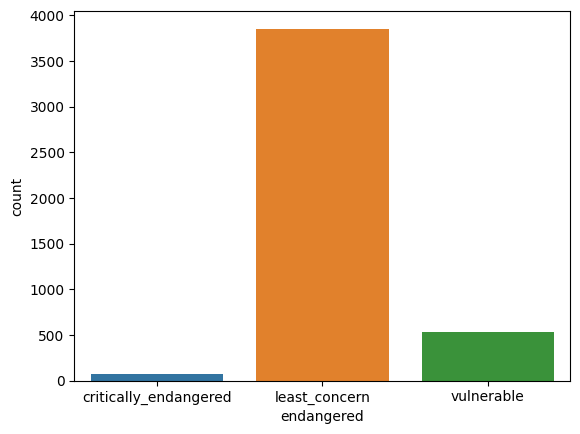

In [13]:
df.value_counts('endangered',sort=True).reset_index(name='count').pipe(lambda df: (sns.barplot(data= df, x= 'endangered',y='count')))

<Axes: xlabel='specie', ylabel='count'>

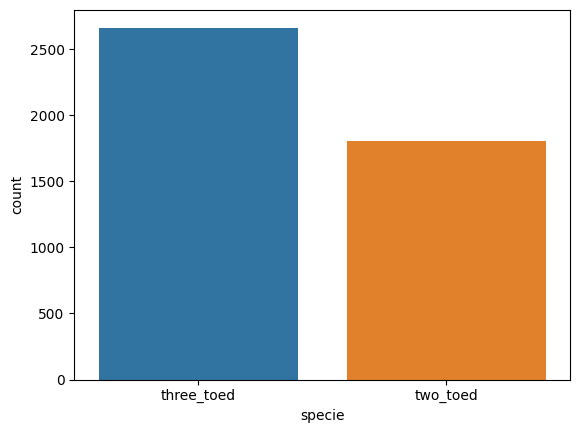

In [14]:
df.value_counts('specie',sort=True).reset_index(name='count').pipe(lambda df: (sns.barplot(data= df, x= 'specie',y='count')))

<Axes: xlabel='sub_specie', ylabel='count'>

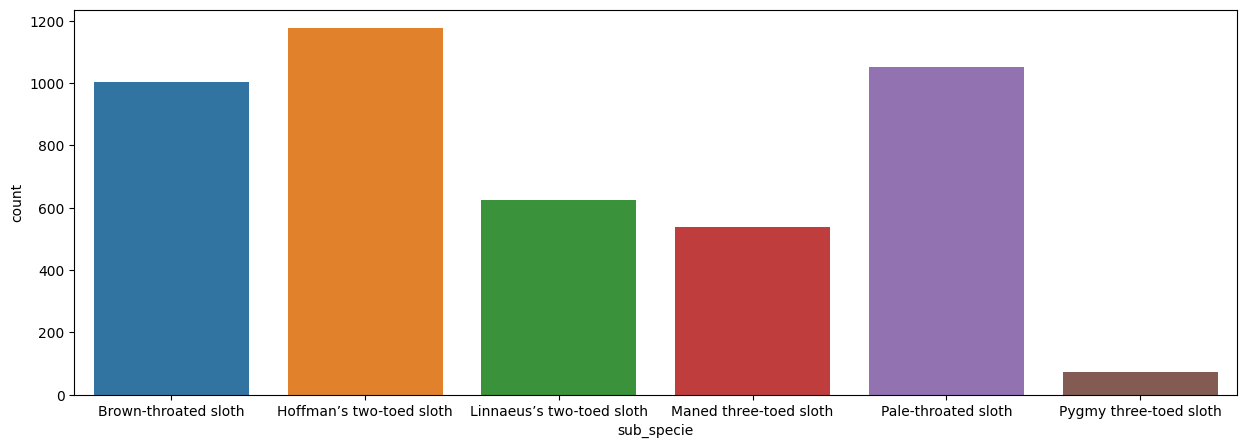

In [15]:
fig = plt.subplots(1,figsize=(15,5))

df.value_counts('sub_specie',sort=False).reset_index(name='count').pipe(lambda df: (sns.barplot(data= df, x= 'sub_specie',y='count')))

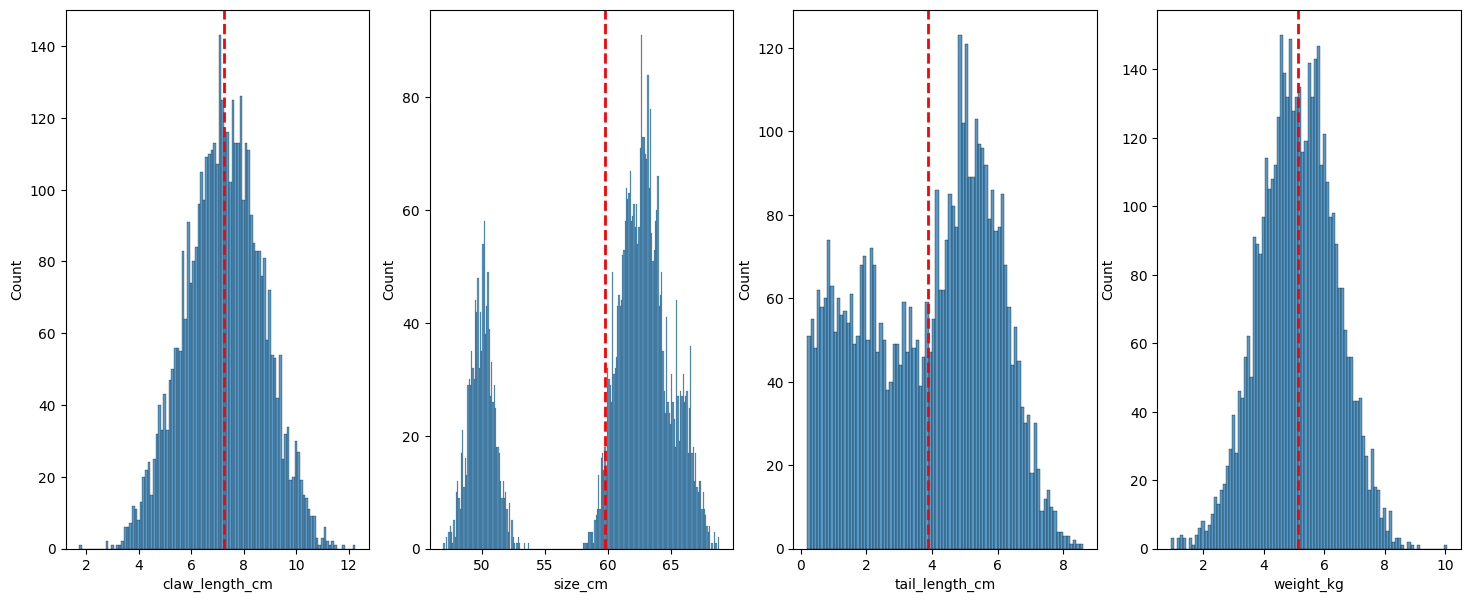

In [74]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (18,7))

i = 0
for names in numbercol_names:
    sns.histplot(data=df, x=names, ax=axs[i], binwidth=0.1)
    axs[i].axvline(x=df[names].mean(), color='red', linestyle='dashed', linewidth=2)
    i+=1


In [17]:
#df[(df['size_cm'] >= 54) & (58 >= df['size_cm'])]
#df = df[df['size_cm']<=54]
#df = df[df['size_cm']>=58]

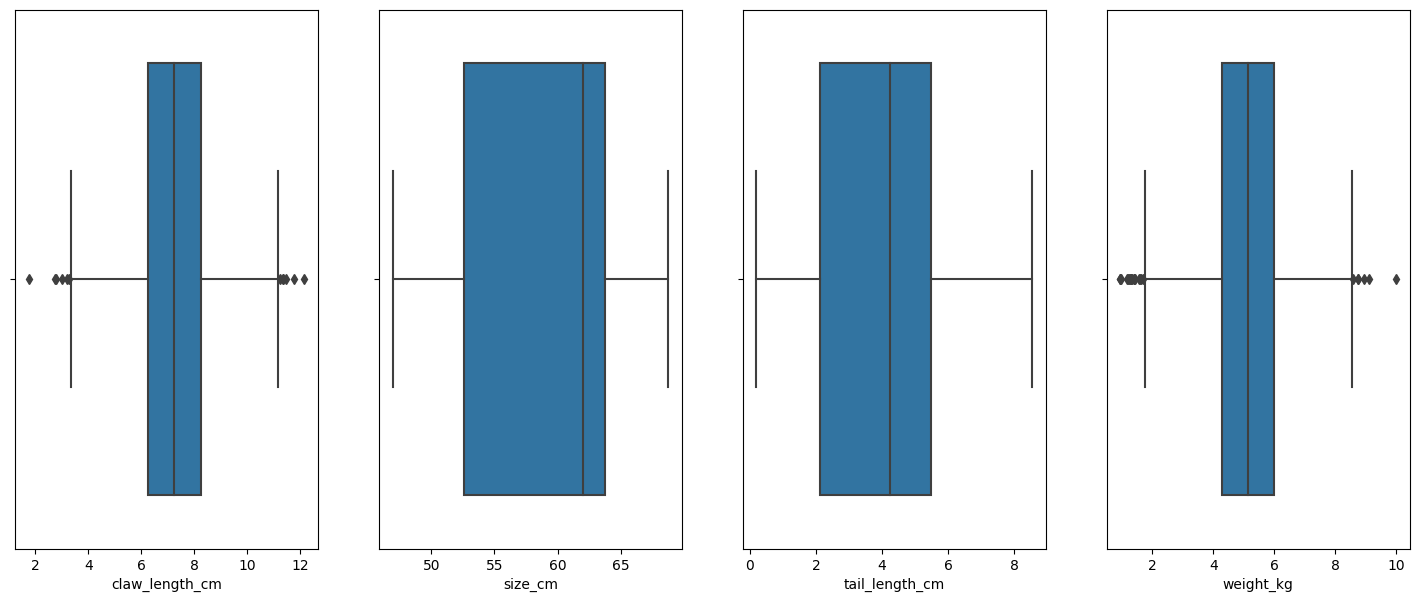

In [18]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (18,7))

i = 0
for names in numbercol_names:
    sns.boxplot(data=df, x=names, ax=axs[i])
    i+=1


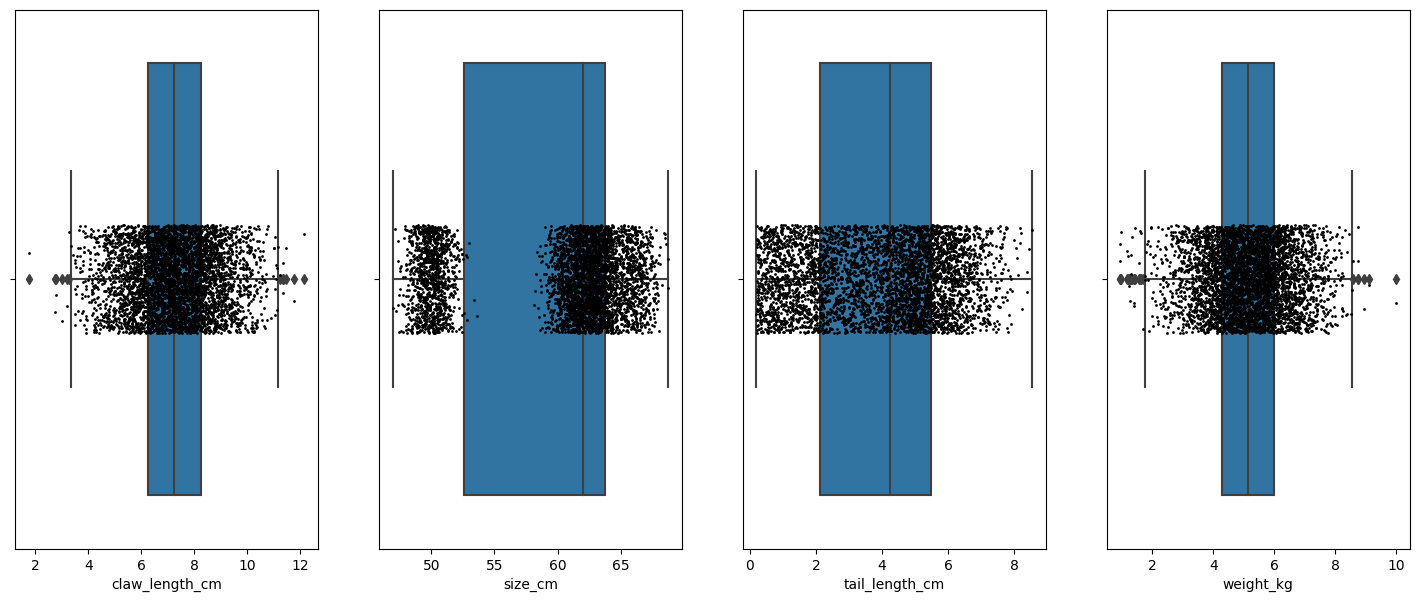

In [106]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (18,7))

i = 0
for names in numbercol_names:
    sns.boxplot(data=df,  x=names, ax=axs[i])
    sns.stripplot(data=df,  x=names, ax=axs[i], color='black', size=2)
    i+=1


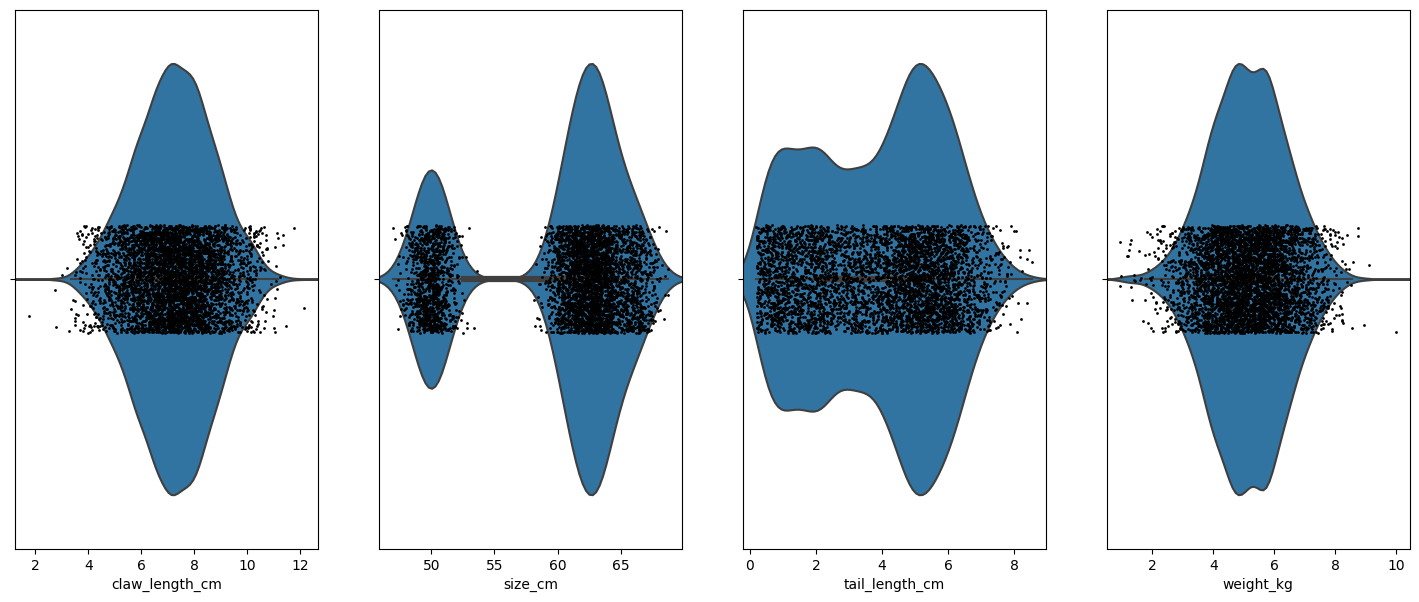

In [108]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (18,7))

i = 0
for names in numbercol_names:
    sns.violinplot(data=df,  x=names, ax=axs[i])
    sns.stripplot(data=df,  x=names, ax=axs[i], color='black', size=2)
    i+=1


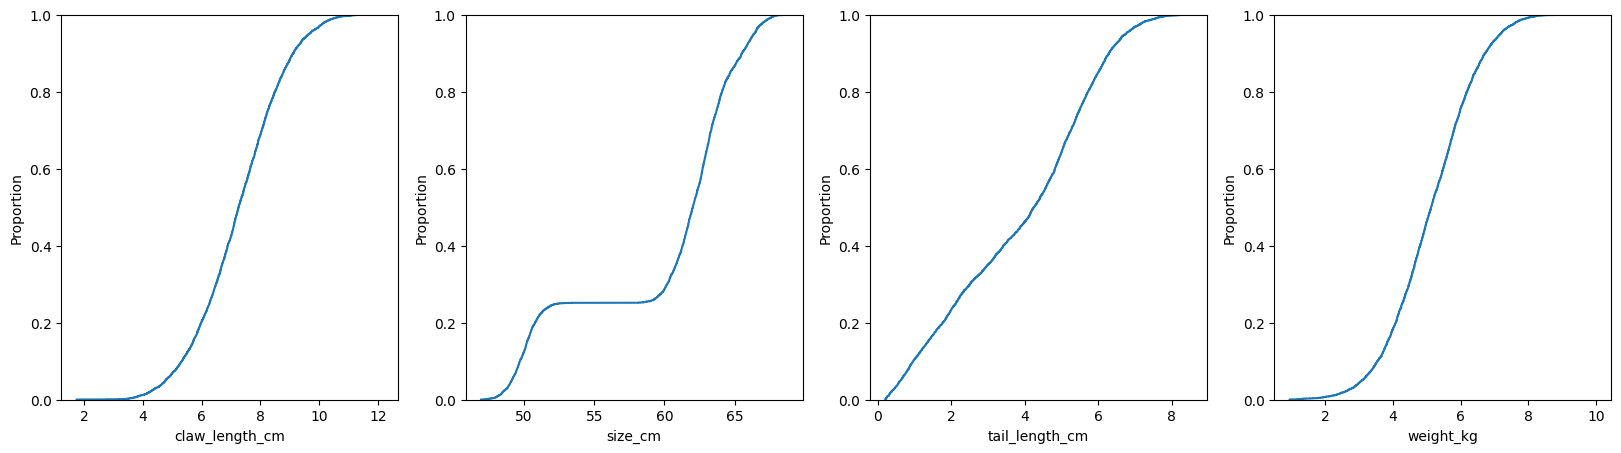

In [19]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (20,5))

i = 0
for names in numbercol_names:
    sns.ecdfplot(data=df, x=names, ax=axs[i])
    i+=1


In [86]:
dfit1 = distfit(method = 'parametric', todf = True, distr = ['norm','expon','loggamma','t','beta','gamma','lognorm','genextreme','dweibull','uniform','expo','pareto'])
dfit1.fit_transform(df['claw_length_cm'])
dfit1.model
dfit1.summary[['name', 'score', 'loc', 'scale']]

[distfit] >INFO> fit
[distfit] >ERROR> [expo] does not exist! <skipping>
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.0 sec] [RSS: 0.00347802] [loc=7.255 scale=1.460]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.596864] [loc=1.748 scale=5.507]
[distfit] >INFO> [loggamma  ] [0.05 sec] [RSS: 0.00315971] [loc=-150.363 scale=27.010]
[distfit] >INFO> [t         ] [0.39 sec] [RSS: 0.00347923] [loc=7.255 scale=1.460]
[distfit] >INFO> [beta      ] [0.08 sec] [RSS: 0.00304643] [loc=-0.426 scale=14.536]
[distfit] >INFO> [gamma     ] [0.11 sec] [RSS: 0.00387986] [loc=-63.664 scale=0.030]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.00347829] [loc=-131070.252 scale=131077.507]
[distfit] >INFO> [genextreme] [0.10 sec] [RSS: 0.00506825] [loc=6.722 scale=1.460]
[distfit] >INFO> [dweibull  ] [0.04 sec] [RSS: 0.0478825] [loc=7.314 scale=1.264]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.401794] [loc=1.748 scale=10.423]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.596864]

name     score            loc          scale
0         beta  0.003046      -0.426202       14.53574
1     loggamma   0.00316    -150.362956      27.010063
2         norm  0.003478       7.255005       1.459973
3      lognorm  0.003478    -131070.252  131077.506997
4            t  0.003479       7.254928       1.459951
5        gamma   0.00388     -63.664302        0.03012
6   genextreme  0.005068       6.721771       1.460207
7     dweibull  0.047882       7.314065       1.264281
8      uniform  0.401794          1.748         10.423
9        expon  0.596864          1.748       5.507005
10      pareto  0.596864 -268435454.252    268435456.0

(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Beta (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

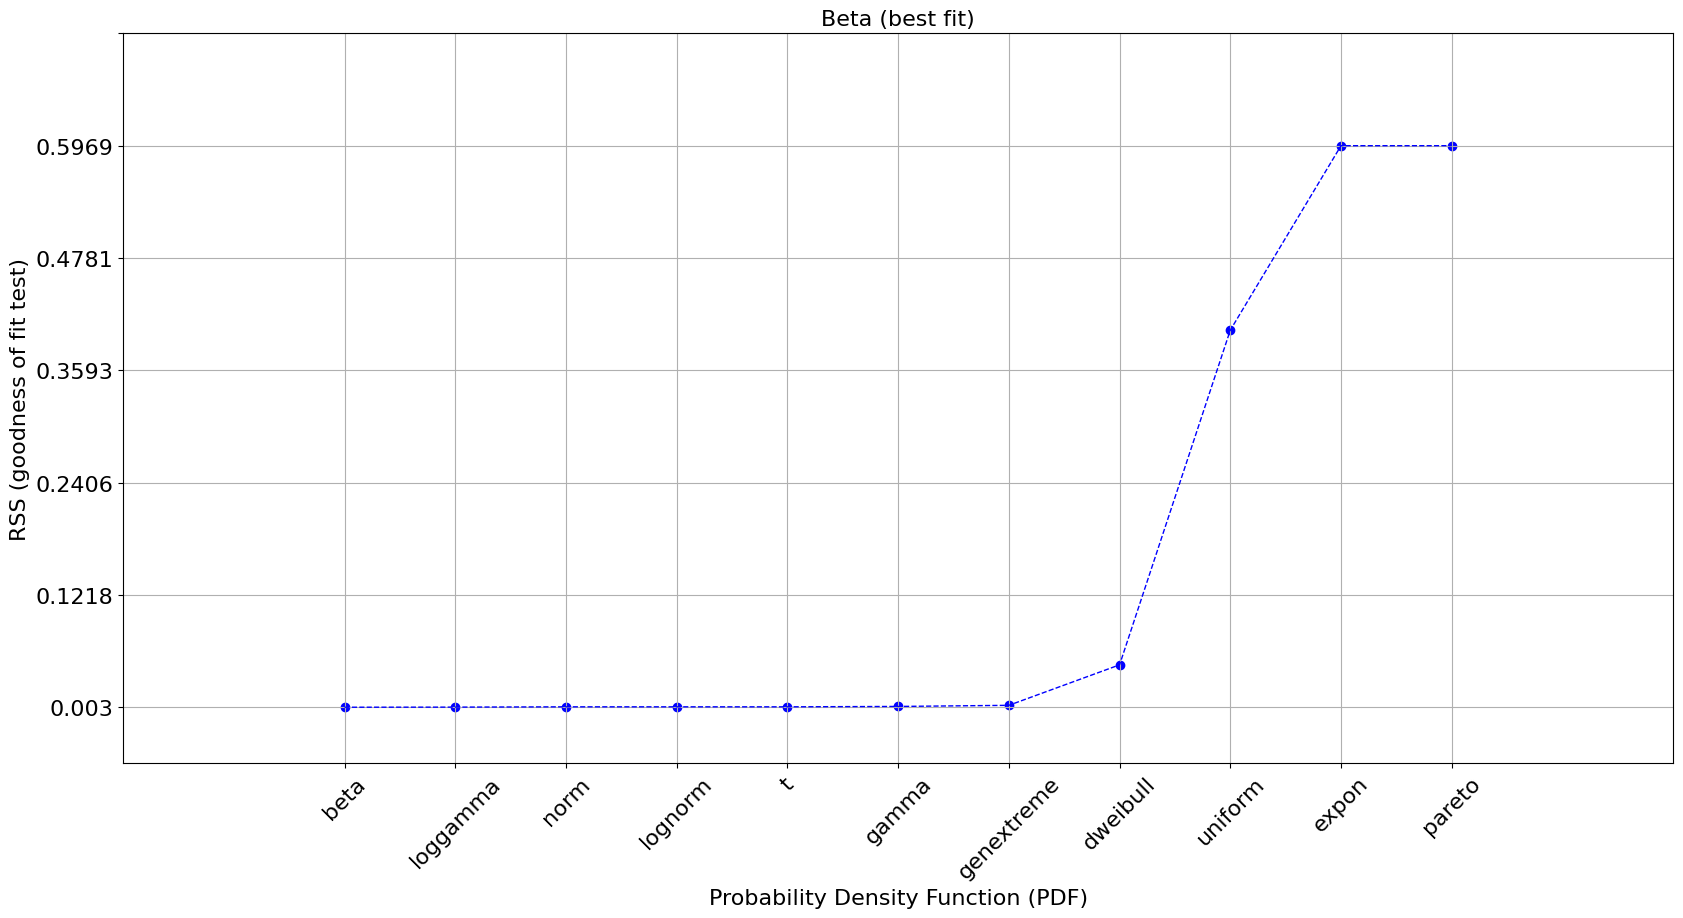

In [87]:
dfit1.plot_summary()

(None,
 <Axes: title={'center': '\nbeta(a=12.526, b=11.178, loc=-0.426202, scale=14.5357)'}, xlabel='Values', ylabel='Frequency'>)

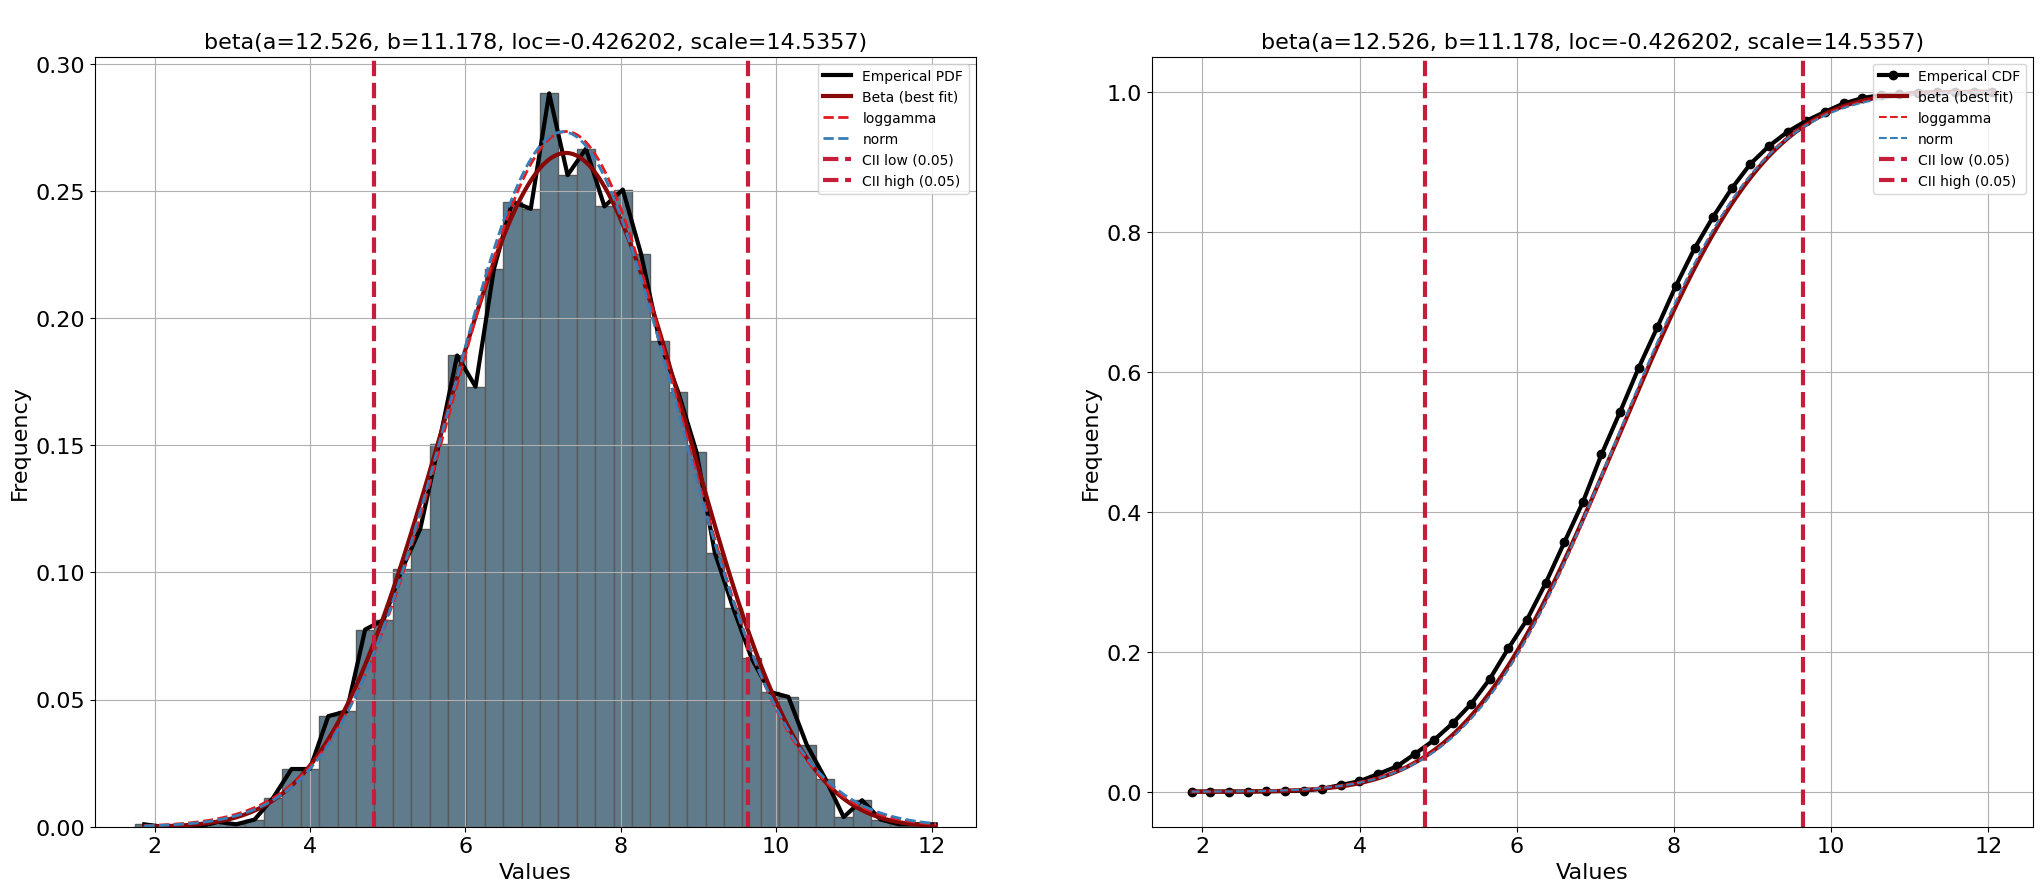

In [88]:
# Create subplot
fig, ax = plt.subplots(1,2, figsize=(25, 10))
# Plot PDF with histogram
dfit1.plot(chart='PDF', n_top=2, ax=ax[0])
# Plot the CDF
dfit1.plot(chart='CDF', n_top=2, ax=ax[1])

In [89]:
dfit2 = distfit(method = 'parametric', todf = True, distr = ['norm','expon','loggamma','t','beta','gamma','lognorm','genextreme','dweibull','uniform','expo','pareto'])
dfit2.fit_transform(df['size_cm'])
dfit2.model
dfit2.summary[['name', 'score', 'loc', 'scale']]


[distfit] >INFO> fit
[distfit] >ERROR> [expo] does not exist! <skipping>
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.0389913] [loc=59.750 scale=5.939]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.0533189] [loc=46.928 scale=12.822]
[distfit] >INFO> [loggamma  ] [0.02 sec] [RSS: 0.0215523] [loc=66.057 scale=1.462]
[distfit] >INFO> [t         ] [0.41 sec] [RSS: 0.038989] [loc=59.750 scale=5.939]
[distfit] >INFO> [beta      ] [0.29 sec] [RSS: 0.0261858] [loc=-92.837 scale=161.672]
[distfit] >INFO> [gamma     ] [0.11 sec] [RSS: 0.039988] [loc=-41.694 scale=0.379]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.0389915] [loc=-1048529.072 scale=1048588.822]
[distfit] >INFO> [genextreme] [0.10 sec] [RSS: 0.0286182] [loc=58.632 scale=6.262]
[distfit] >INFO> [dweibull  ] [0.18 sec] [RSS: 0.0154863] [loc=62.634 scale=3.855]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0387185] [loc=46.928 scale=21.832]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.05331

name     score             loc           scale
0     dweibull  0.015486          62.634        3.854961
1     loggamma  0.021552        66.05724        1.462209
2         beta  0.026186      -92.837158      161.671909
3   genextreme  0.028618        58.63207        6.262329
4      uniform  0.038718          46.928          21.832
5            t  0.038989       59.750249        5.938806
6         norm  0.038991       59.749583        5.939001
7      lognorm  0.038992    -1048529.072  1048588.821566
8        gamma  0.039988       -41.69371        0.378768
9        expon  0.053319          46.928       12.821583
10      pareto  0.053319 -2147483601.072    2147483648.0

(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Dweibull (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

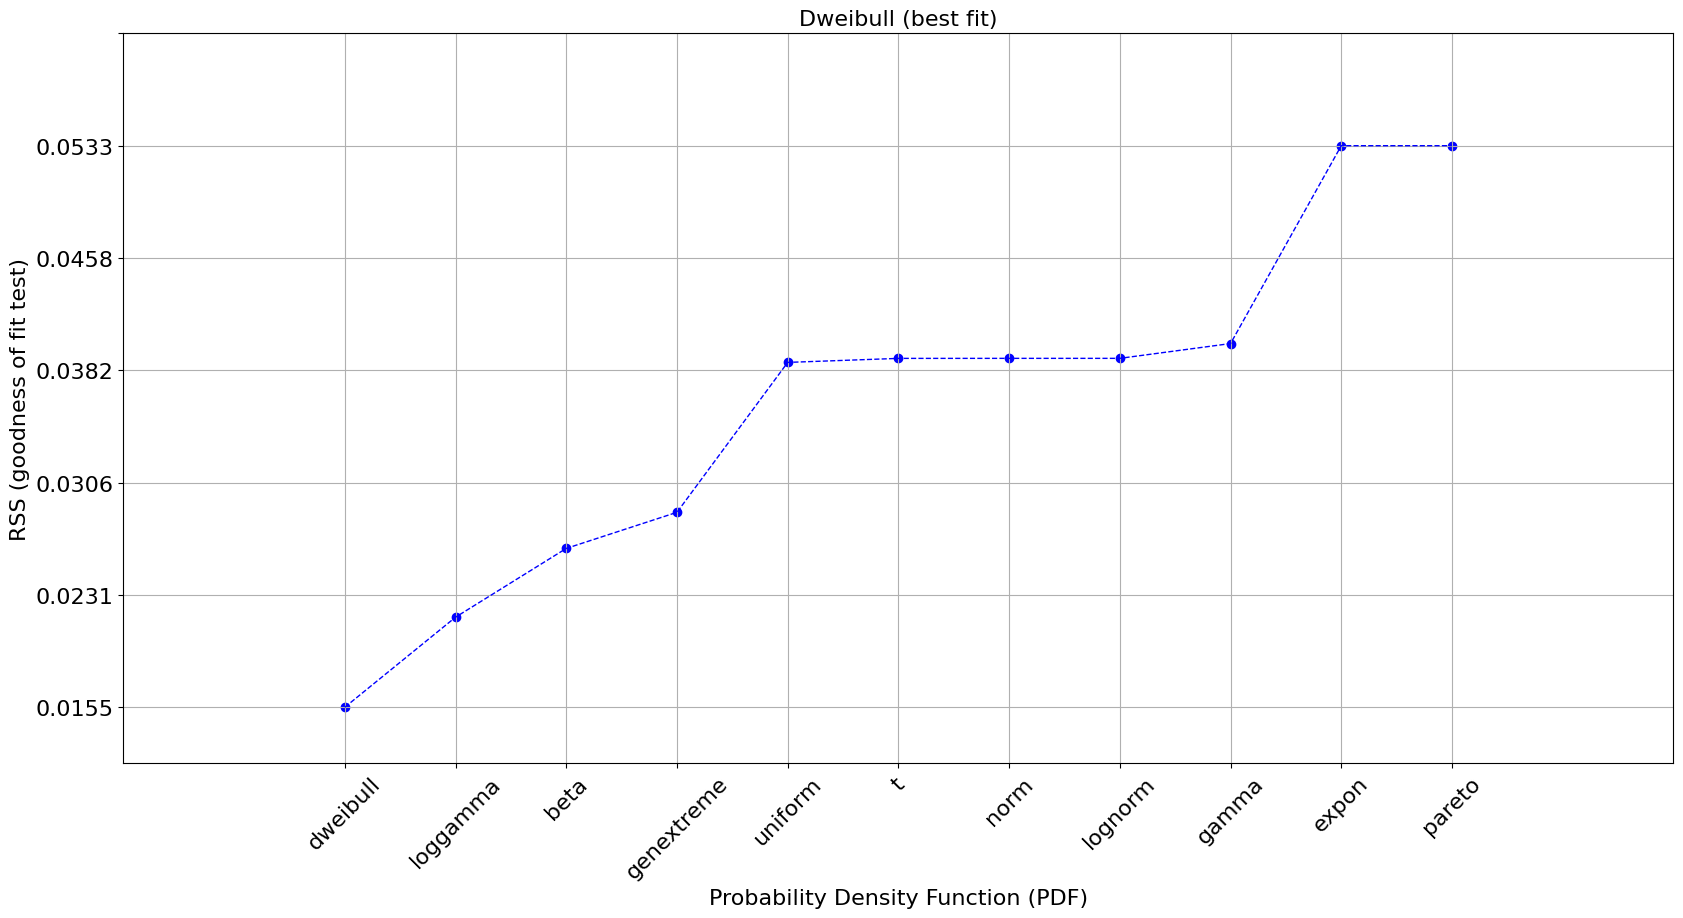

In [90]:
dfit2.plot_summary()

(None,
 <Axes: title={'center': '\ndweibull(c=0.813574, loc=62.634, scale=3.85496)'}, xlabel='Values', ylabel='Frequency'>)

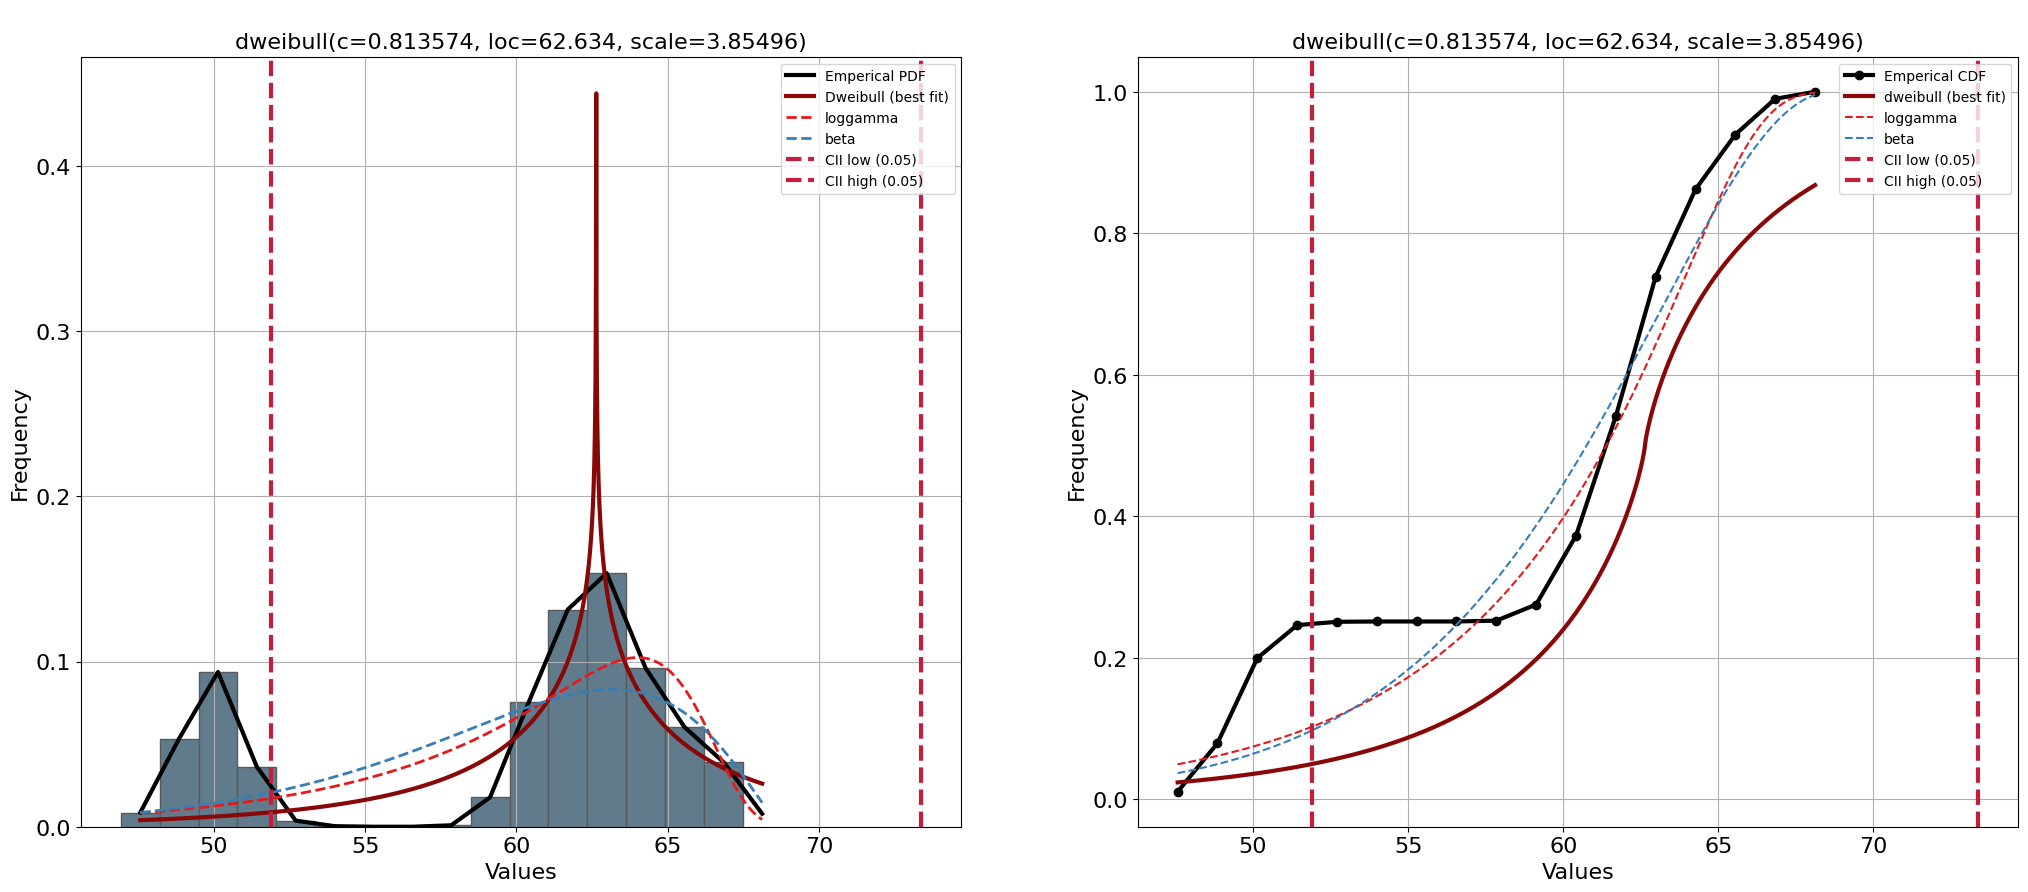

In [92]:
# Create subplot
fig, ax = plt.subplots(1,2, figsize=(25, 10))
# Plot PDF with histogram
dfit2.plot(chart='PDF', n_top=2, ax=ax[0])
# Plot the CDF
dfit2.plot(chart='CDF', n_top=2, ax=ax[1])

In [93]:
dfit3 = distfit(method = 'parametric', todf = True, distr = ['norm','expon','loggamma','t','beta','gamma','lognorm','genextreme','dweibull','uniform','expo','pareto'])
dfit3.fit_transform(df['tail_length_cm'])
dfit3.model
dfit3.summary[['name', 'score', 'loc', 'scale']]


[distfit] >INFO> fit
[distfit] >ERROR> [expo] does not exist! <skipping>
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.0578371] [loc=3.887 scale=1.982]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.133148] [loc=0.201 scale=3.686]
[distfit] >INFO> [loggamma  ] [0.01 sec] [RSS: 0.0476759] [loc=-2.895 scale=4.359]
[distfit] >INFO> [t         ] [0.41 sec] [RSS: 0.0578366] [loc=3.887 scale=1.982]
[distfit] >INFO> [beta      ] [0.12 sec] [RSS: 0.0420257] [loc=0.128 scale=8.417]
[distfit] >INFO> [gamma     ] [0.11 sec] [RSS: 0.0600775] [loc=-34.618 scale=0.104]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.0578383] [loc=-131071.799 scale=131075.686]
[distfit] >INFO> [genextreme] [0.12 sec] [RSS: 0.0438622] [loc=3.281 scale=2.053]
[distfit] >INFO> [dweibull  ] [0.04 sec] [RSS: 0.0373904] [loc=3.682 scale=1.942]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.0749495] [loc=0.201 scale=8.337]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.133148] [loc=-2684

name     score            loc          scale
0     dweibull   0.03739       3.681951       1.942217
1         beta  0.042026       0.127902       8.416944
2   genextreme  0.043862       3.280626        2.05295
3     loggamma  0.047676      -2.894635       4.359392
4            t  0.057837       3.886923       1.982188
5         norm  0.057837       3.886917       1.982183
6      lognorm  0.057838    -131071.799  131075.685902
7        gamma  0.060077     -34.617563       0.104083
8      uniform  0.074949          0.201          8.337
9        expon  0.133148          0.201       3.685917
10      pareto  0.133148 -268435455.799    268435456.0

(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Dweibull (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

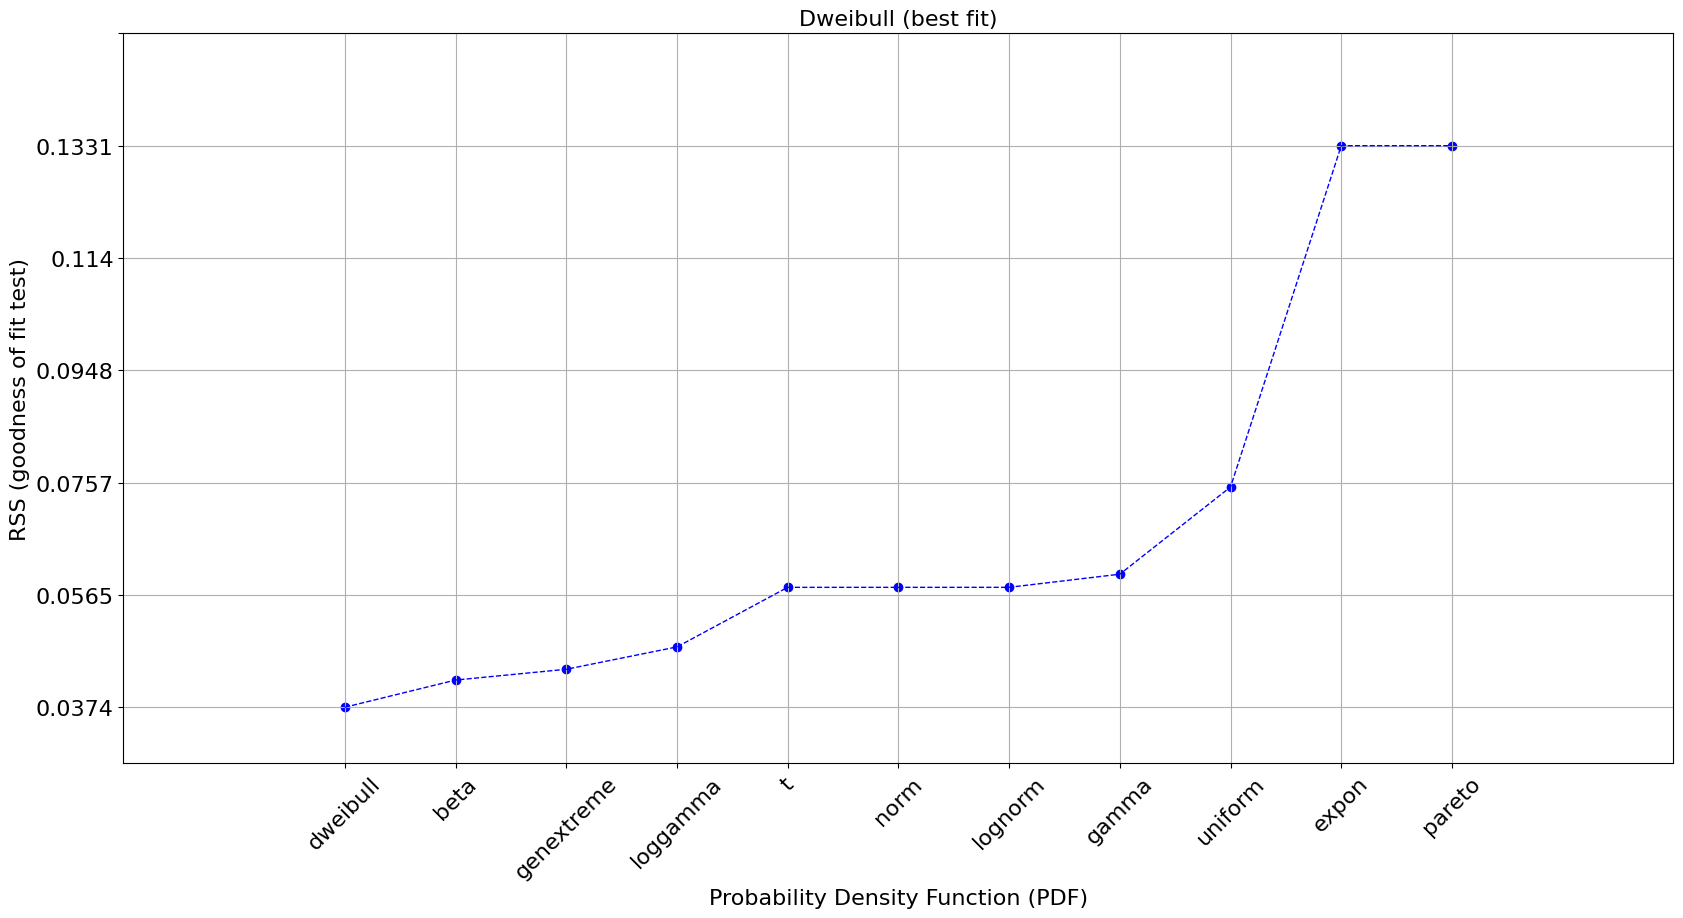

In [94]:
dfit3.plot_summary()

(None,
 <Axes: title={'center': '\ndweibull(c=1.7671, loc=3.68195, scale=1.94222)'}, xlabel='Values', ylabel='Frequency'>)

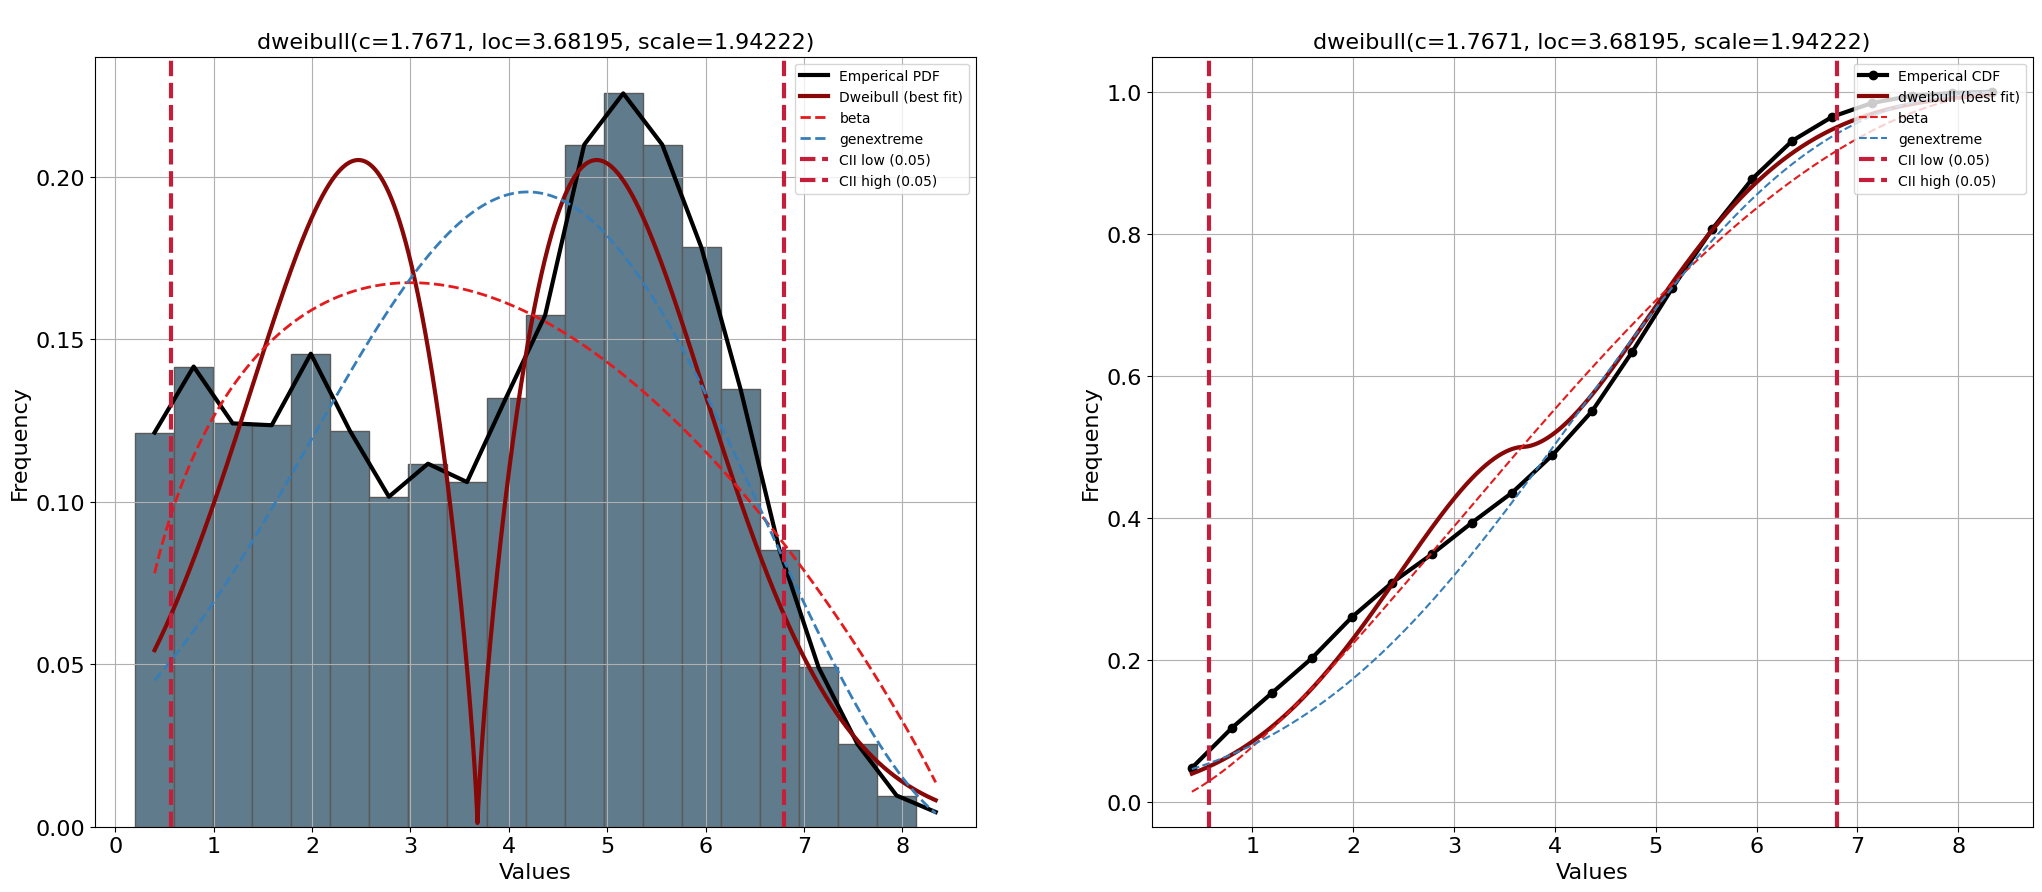

In [95]:
# Create subplot
fig, ax = plt.subplots(1,2, figsize=(25, 10))
# Plot PDF with histogram
dfit3.plot(chart='PDF', n_top=2, ax=ax[0])
# Plot the CDF
dfit3.plot(chart='CDF', n_top=2, ax=ax[1])

In [82]:
dfit = distfit(method = 'parametric', todf = True, distr = ['norm','expon','loggamma','t','beta','gamma','lognorm','genextreme','dweibull','uniform','expo','pareto'])
dfit.fit_transform(df['weight_kg'])
dfit.model
dfit.summary[['name', 'score', 'loc', 'scale']]


[distfit] >INFO> fit
[distfit] >ERROR> [expo] does not exist! <skipping>
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 0.00546856] [loc=5.131 scale=1.242]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 0.779062] [loc=0.946 scale=4.185]
[distfit] >INFO> [loggamma  ] [0.05 sec] [RSS: 0.00558032] [loc=-120.753 scale=21.925]
[distfit] >INFO> [t         ] [0.39 sec] [RSS: 0.00546856] [loc=5.131 scale=1.242]
[distfit] >INFO> [beta      ] [0.11 sec] [RSS: 0.00524866] [loc=-7.066 scale=21.762]
[distfit] >INFO> [gamma     ] [0.10 sec] [RSS: 0.00563639] [loc=-49.612 scale=0.028]
[distfit] >INFO> [lognorm   ] [0.00 sec] [RSS: 0.00546859] [loc=-131071.054 scale=131076.185]
[distfit] >INFO> [genextreme] [0.18 sec] [RSS: 0.00875979] [loc=4.655 scale=1.238]
[distfit] >INFO> [dweibull  ] [0.04 sec] [RSS: 0.0130028] [loc=5.097 scale=1.080]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 0.562332] [loc=0.946 scale=9.051]
[distfit] >INFO> [pareto    ] [0.00 sec] [RSS: 0.779062]

name     score             loc          scale
0         beta  0.005249        -7.06627      21.762365
1         norm  0.005469        5.131131       1.242238
2            t  0.005469        5.131133       1.242237
3      lognorm  0.005469     -131071.054  131076.185125
4     loggamma   0.00558     -120.752954      21.925492
5        gamma  0.005636      -49.612016       0.028221
6   genextreme   0.00876        4.655088       1.238265
7     dweibull  0.013003        5.097226       1.079519
8      uniform  0.562332           0.946          9.051
9       pareto  0.779062 -1073741823.054   1073741824.0
10       expon  0.779062           0.946       4.185131

(<Figure size 2000x1000 with 1 Axes>,
 <Axes: title={'center': 'Beta (best fit)'}, xlabel='Probability Density Function (PDF)', ylabel='RSS (goodness of fit test)'>)

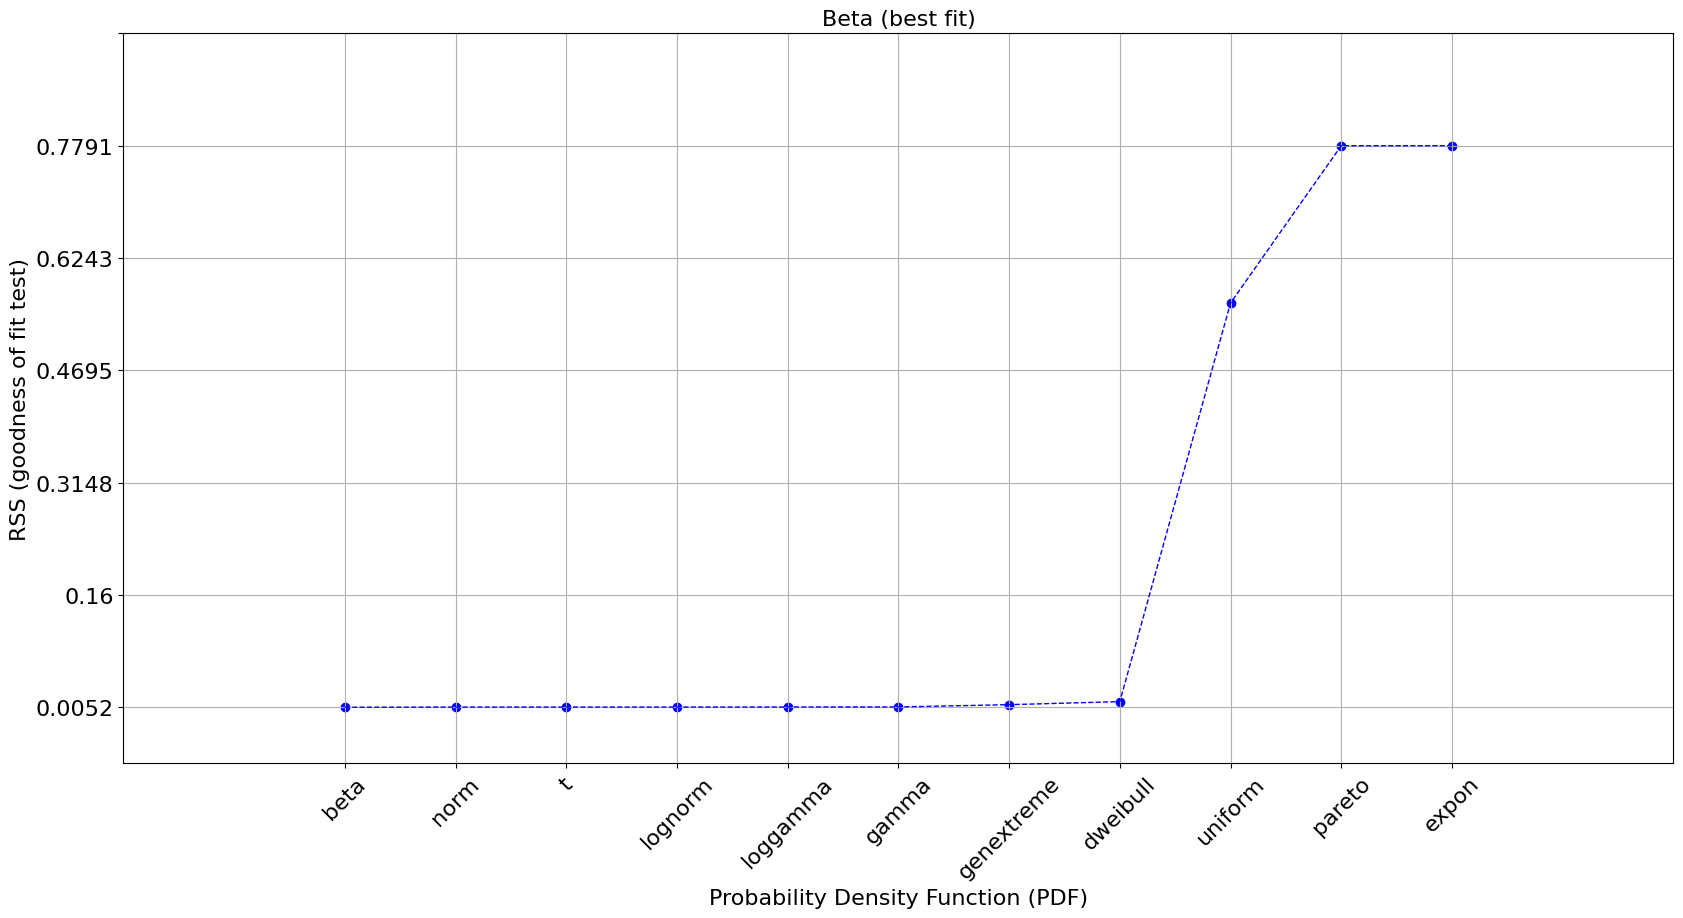

In [78]:
dfit.plot_summary()

(None,
 <Axes: title={'center': '\nbeta(a=41.8141, b=32.7898, loc=-7.06627, scale=21.7624)'}, xlabel='Values', ylabel='Frequency'>)

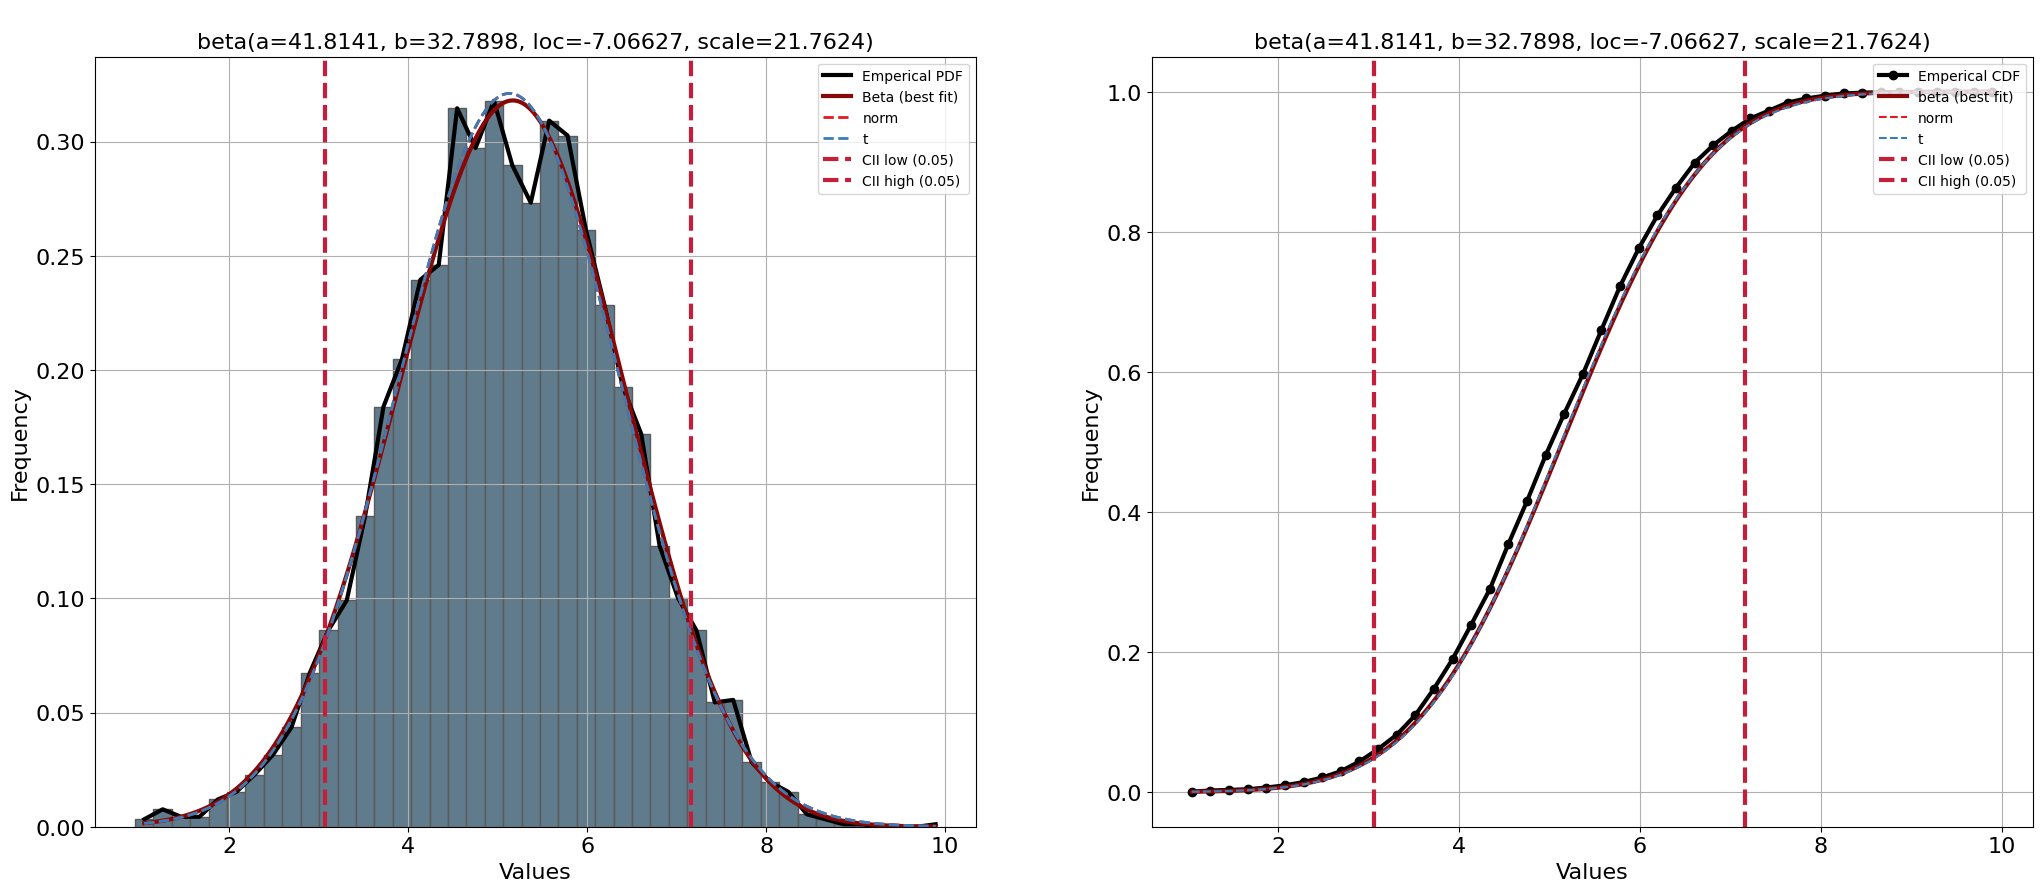

In [83]:
# Create subplot
fig, ax = plt.subplots(1,2, figsize=(25, 10))
# Plot PDF with histogram
dfit.plot(chart='PDF', n_top=2, ax=ax[0])
# Plot the CDF
dfit.plot(chart='CDF', n_top=2, ax=ax[1])

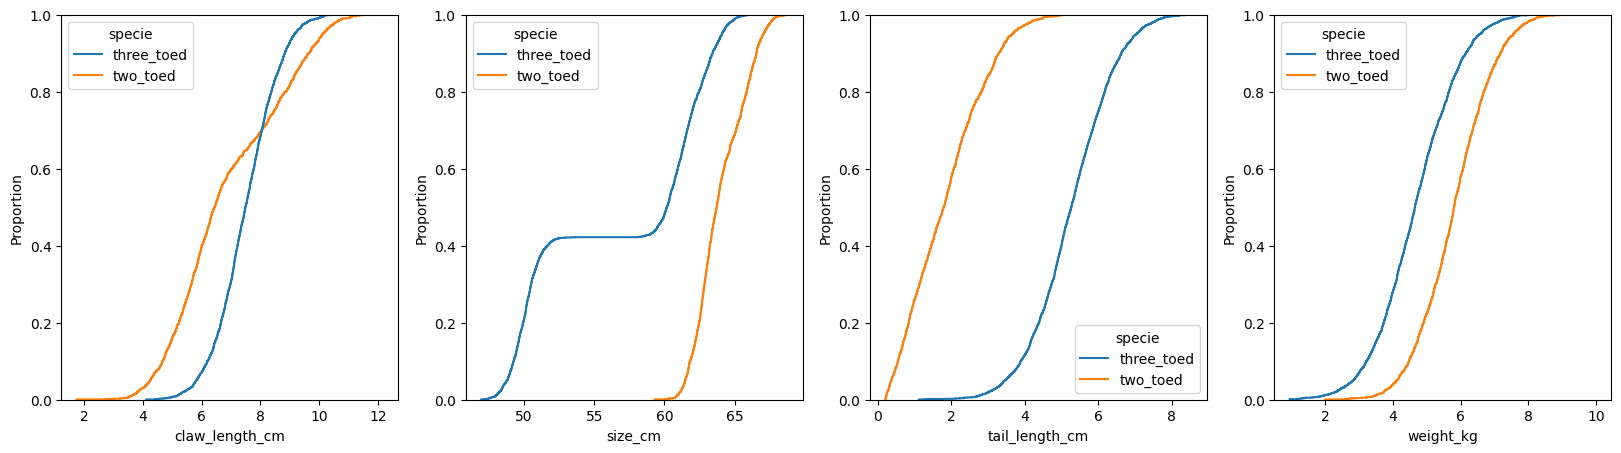

In [20]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (20,5))

i = 0
for names in numbercol_names:
    sns.ecdfplot(data=df, x=names, ax=axs[i], hue='specie')
    i+=1


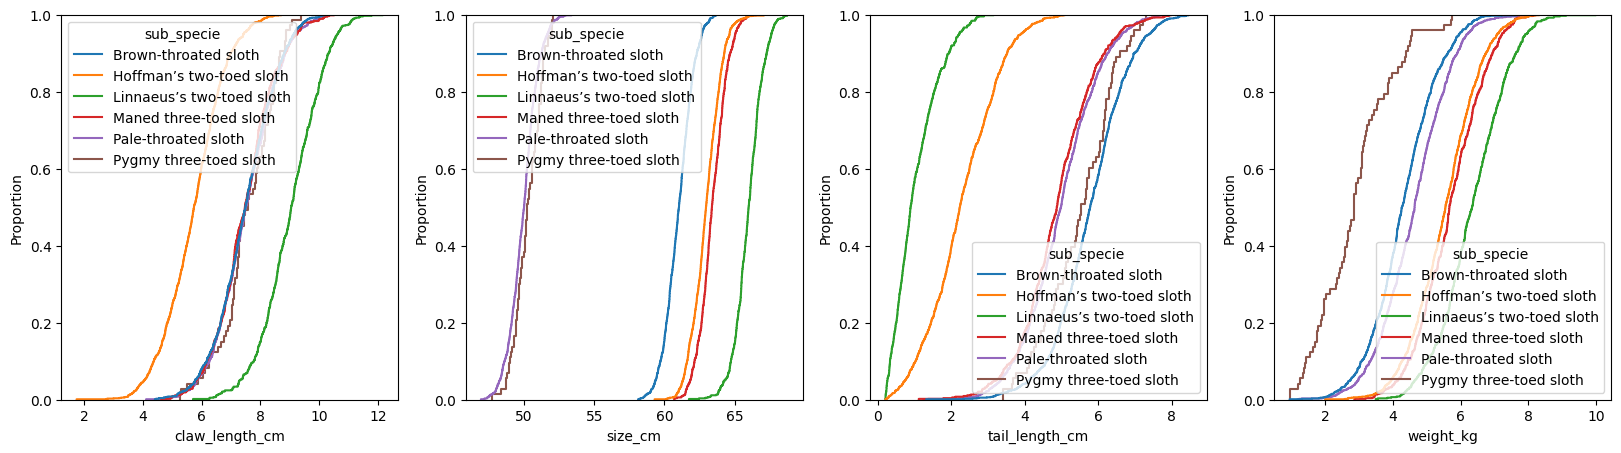

In [21]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (20,5))

i = 0
for names in numbercol_names:
    sns.ecdfplot(data=df, x=names, ax=axs[i], hue='sub_specie')
    i+=1


c:\Users\Janus\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


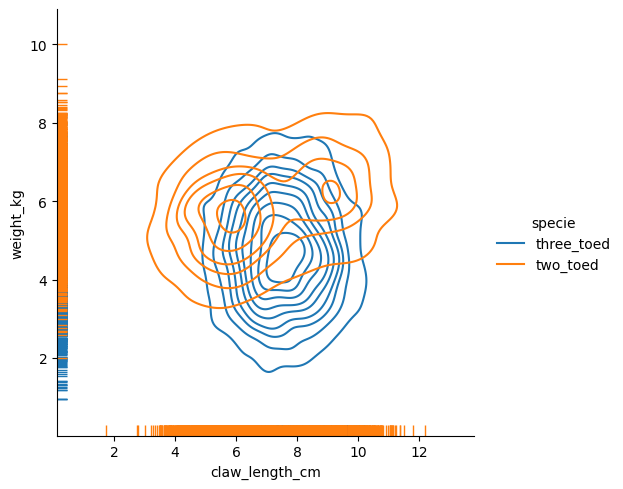

In [24]:
sns.displot(data= df, x= 'claw_length_cm', y='weight_kg', rug=True, hue = 'specie', kind='kde')

<Axes: xlabel='claw_length_cm', ylabel='weight_kg'>

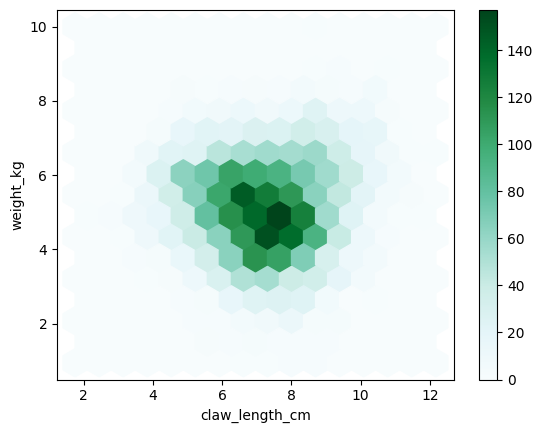

In [25]:
df.plot.hexbin(x= 'claw_length_cm', y= 'weight_kg',gridsize=15)

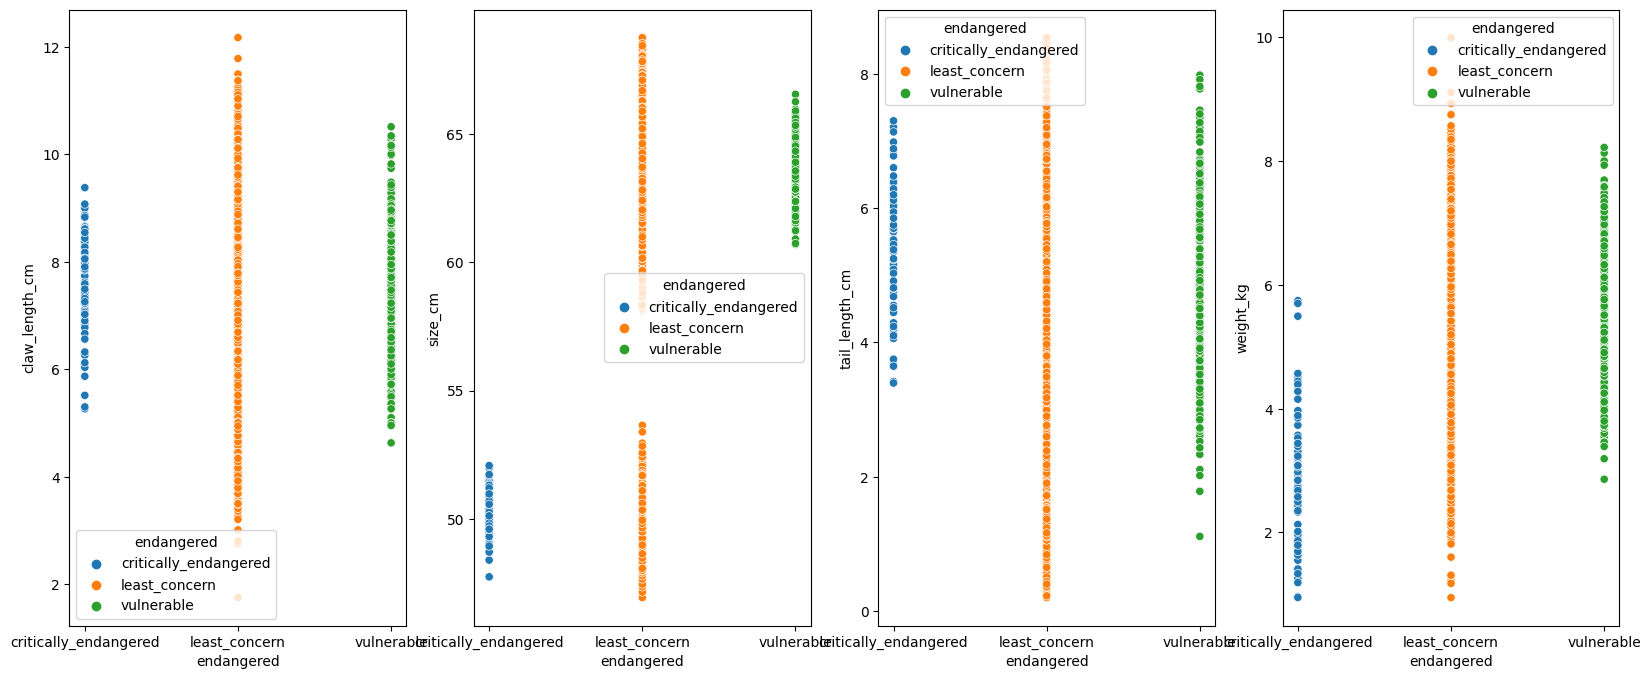

In [26]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (20,8))

i = 0
for names in numbercol_names:
    sns.scatterplot(data=df, x='endangered', y=names, ax=axs[i], hue='endangered')
    i+=1


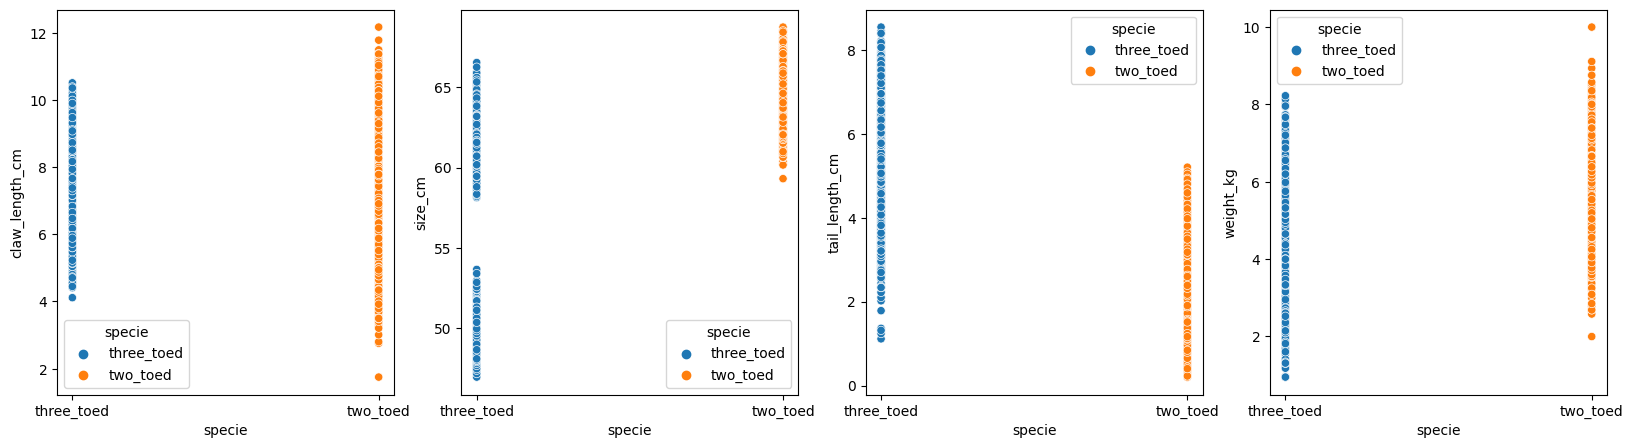

In [27]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (20,5))

i = 0
for names in numbercol_names:
    sns.scatterplot(data=df, x='specie', y=names, ax=axs[i], hue='specie')
    i+=1


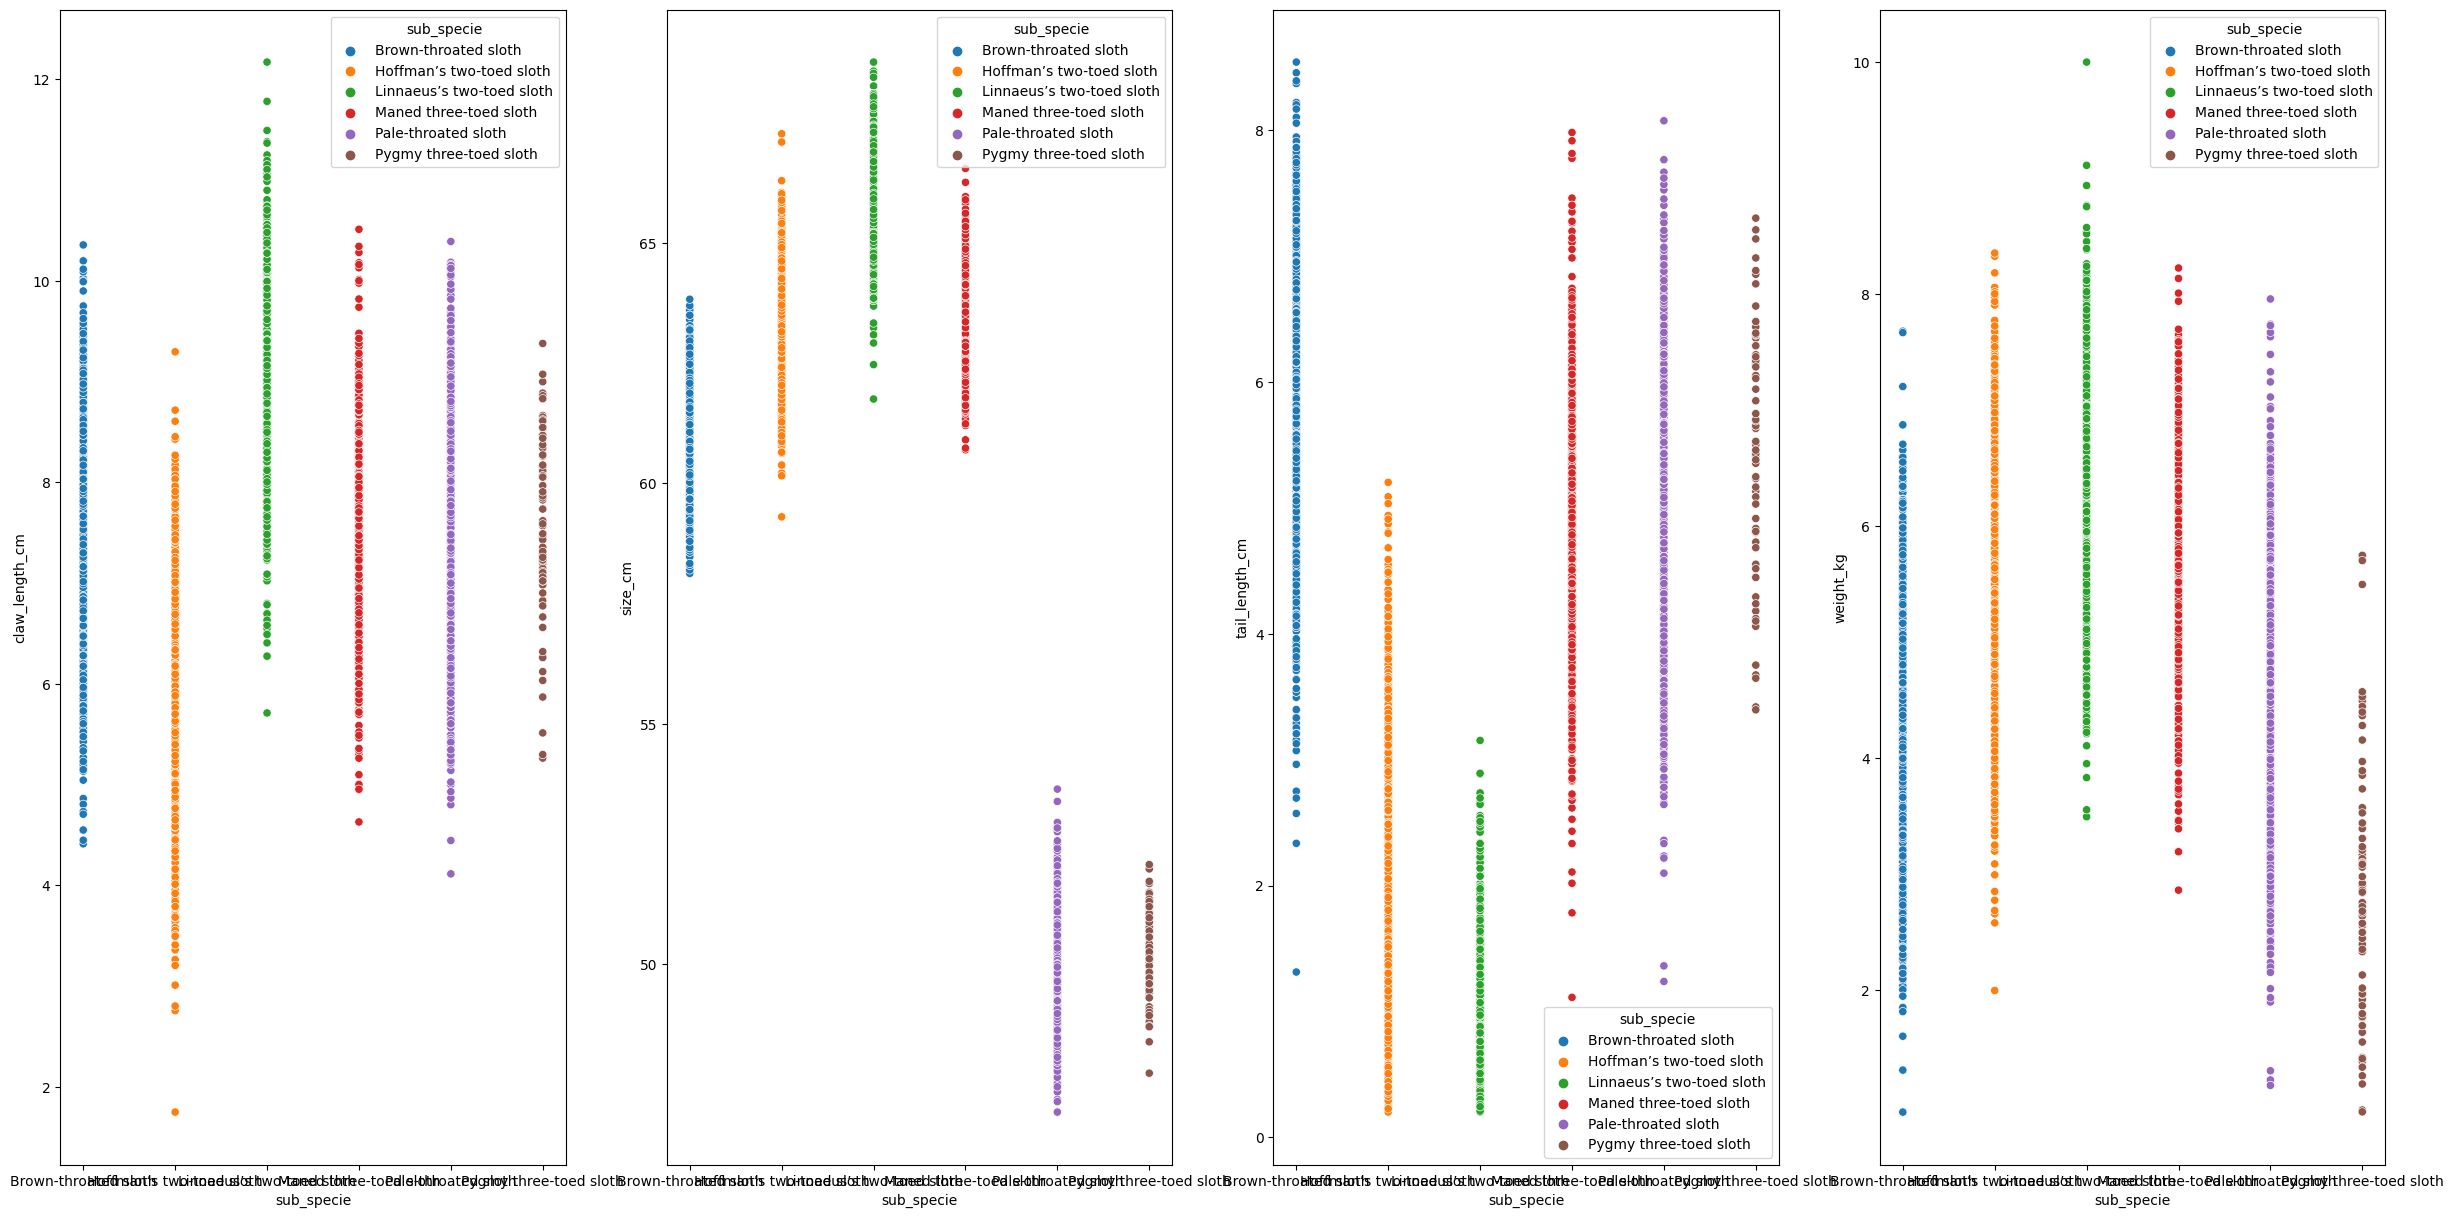

In [28]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (30,15))

i = 0
for names in numbercol_names:
    sns.scatterplot(data=df, x='sub_specie', y=names, ax=axs[i], hue='sub_specie')
    i+=1


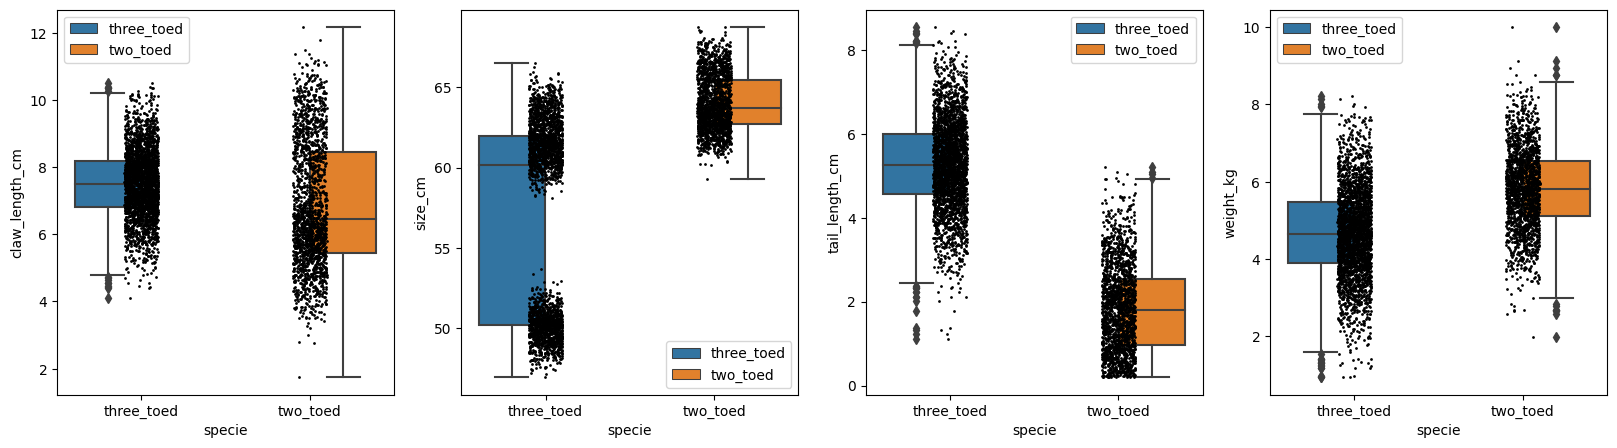

In [29]:
fig, axs = plt.subplots(ncols=len(numbercol_names), figsize = (20,5))

i = 0
for names in numbercol_names:
    sns.boxplot(data=df, x='specie', y=names, ax=axs[i], hue='specie')
    sns.stripplot(data=df, x='specie', y=names, ax=axs[i], color='black', size=2)
    i+=1


<Axes: xlabel='specie', ylabel='claw_length_cm'>

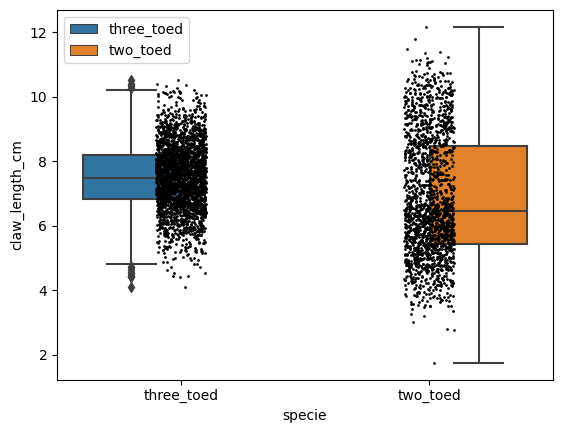

In [30]:
sns.boxplot(data = df, x = 'specie', y = 'claw_length_cm', hue = 'specie')
sns.stripplot(data = df, x = 'specie', y = 'claw_length_cm', color = 'black', size = 2)

<Axes: xlabel='specie', ylabel='claw_length_cm'>

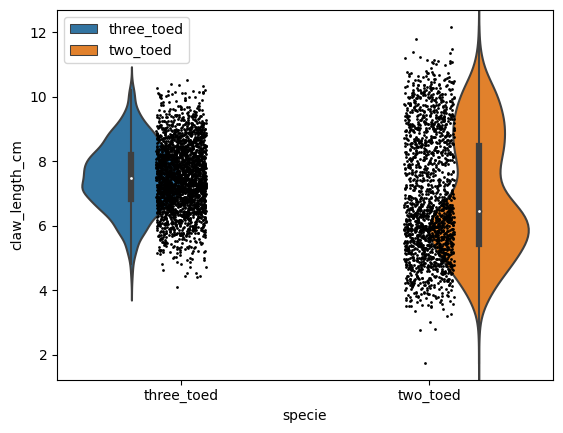

In [31]:
sns.violinplot(data = df, x = 'specie', y = 'claw_length_cm', hue = 'specie')
sns.stripplot(data = df, x = 'specie', y = 'claw_length_cm', color = 'black', size = 2)

In [32]:
#sns.swarmplot(data = df, x = 'specie', y = 'claw_length_cm', hue = 'specie')

In [33]:
correlation_columns = df.describe(include=np.number).columns
correlation = df[correlation_columns].corr()
correlation

claw_length_cm   size_cm  tail_length_cm  weight_kg
claw_length_cm        1.000000 -0.030977        0.051270   0.037653
size_cm              -0.030977  1.000000       -0.479885   0.400918
tail_length_cm        0.051270 -0.479885        1.000000  -0.457793
weight_kg             0.037653  0.400918       -0.457793   1.000000

<Axes: >

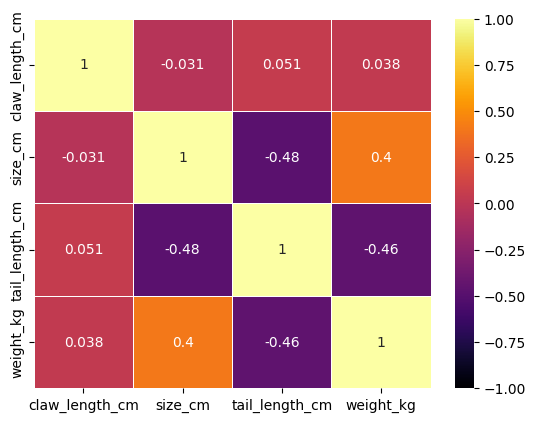

In [34]:
sns.heatmap(
    data = correlation,
    cmap = 'inferno',
    center = 0,
    vmin = -1,
    vmax = 1,
    linewidths = 0.5,
    annot = True
)

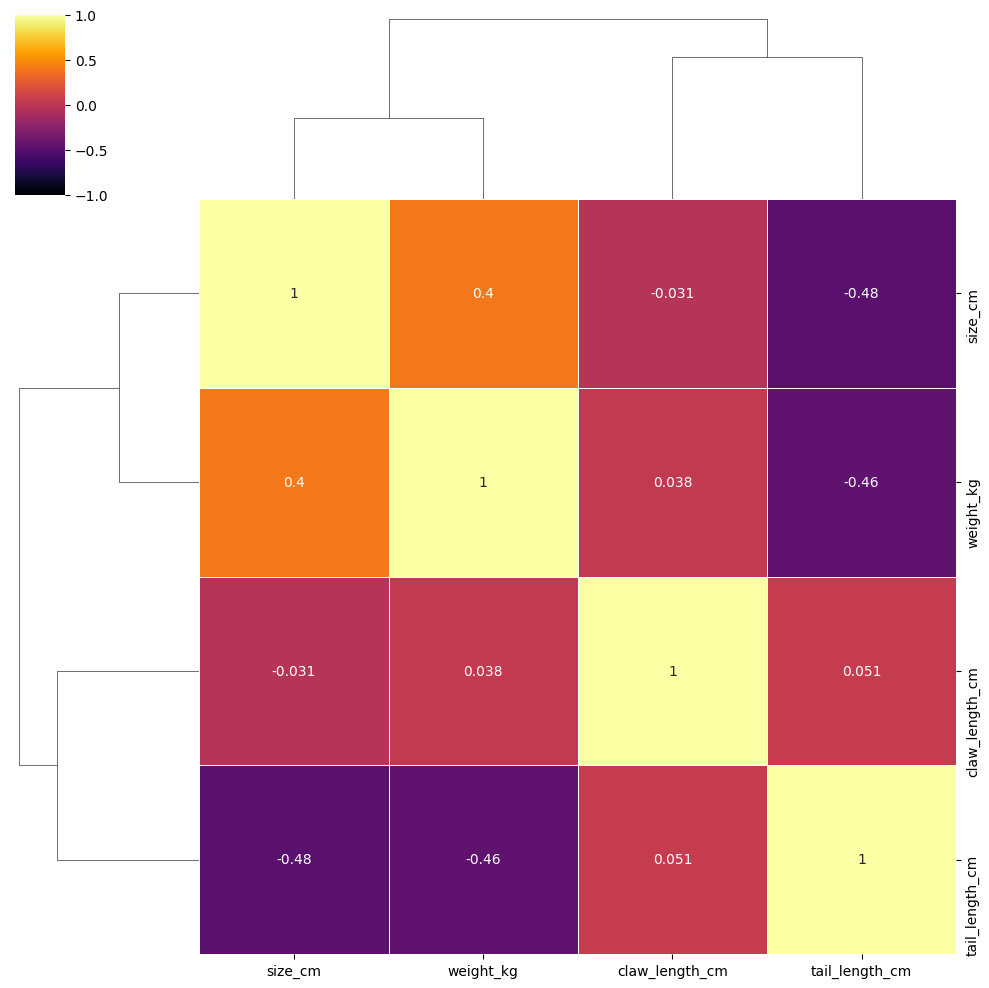

In [35]:
sns.clustermap(
    data = correlation,
    cmap = 'inferno',
    center = 0,
    vmin = -1,
    vmax = 1,
    linewidths = 0.5,
    annot = True
)

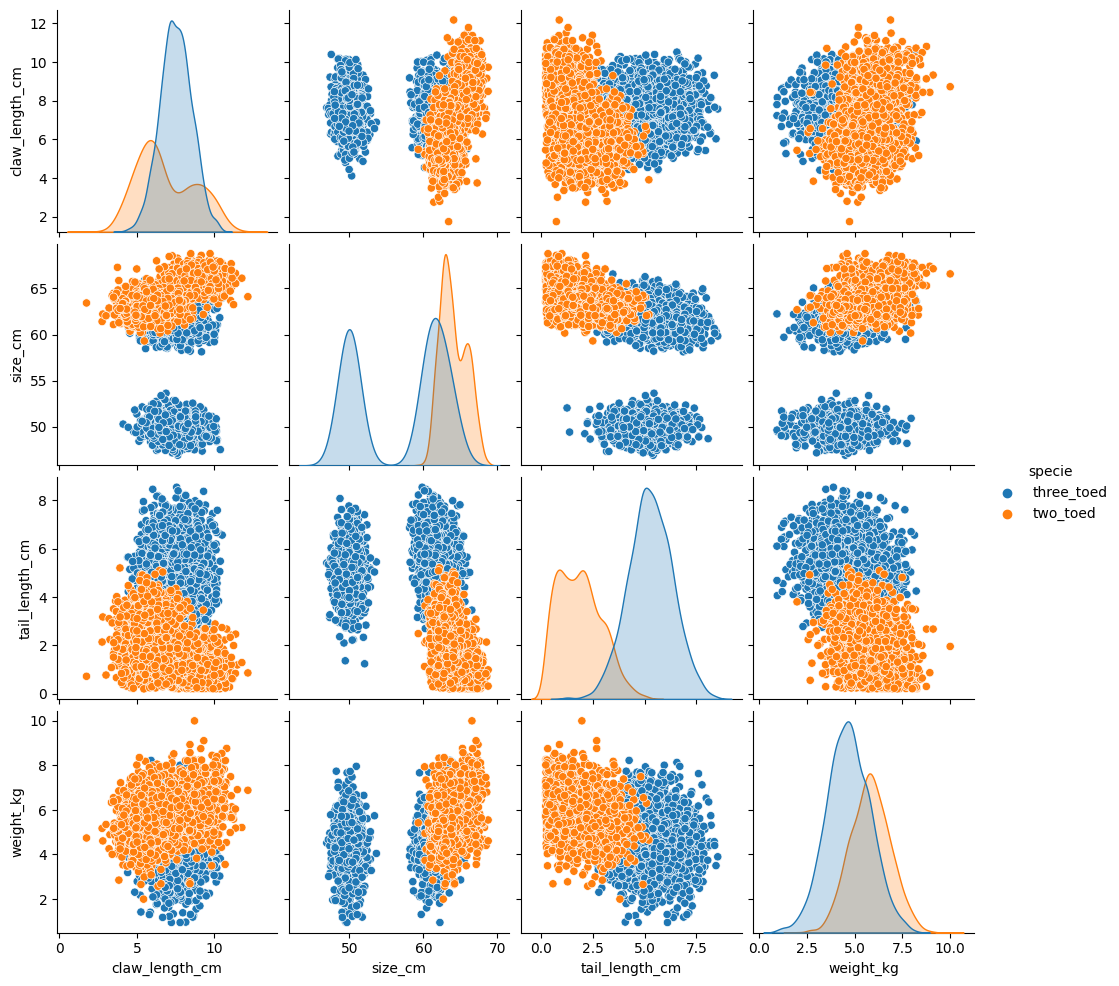

In [112]:
sns.pairplot(data =df, hue = 'specie')

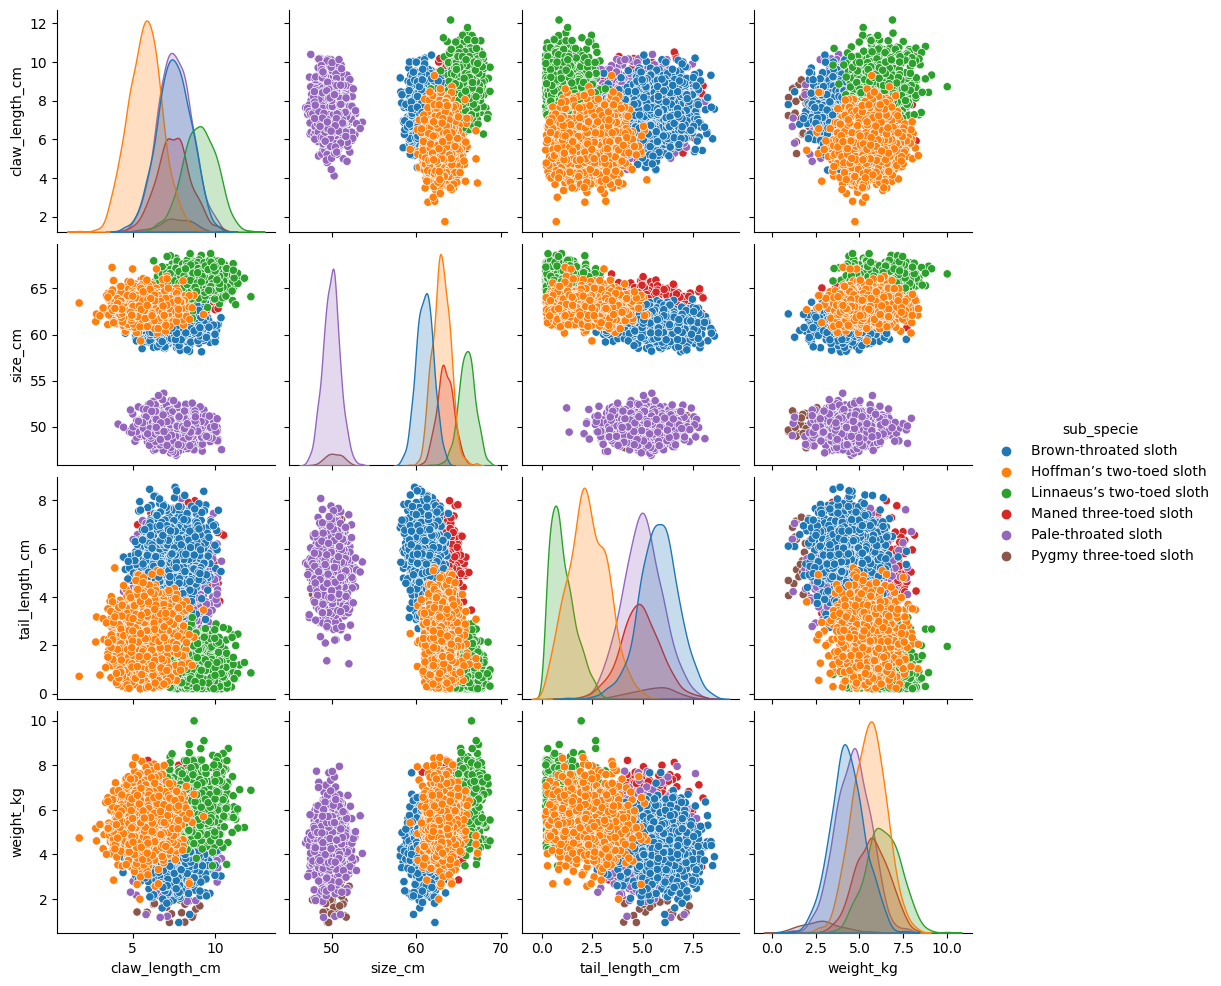

In [109]:
sns.pairplot(data =df, hue = 'sub_specie')

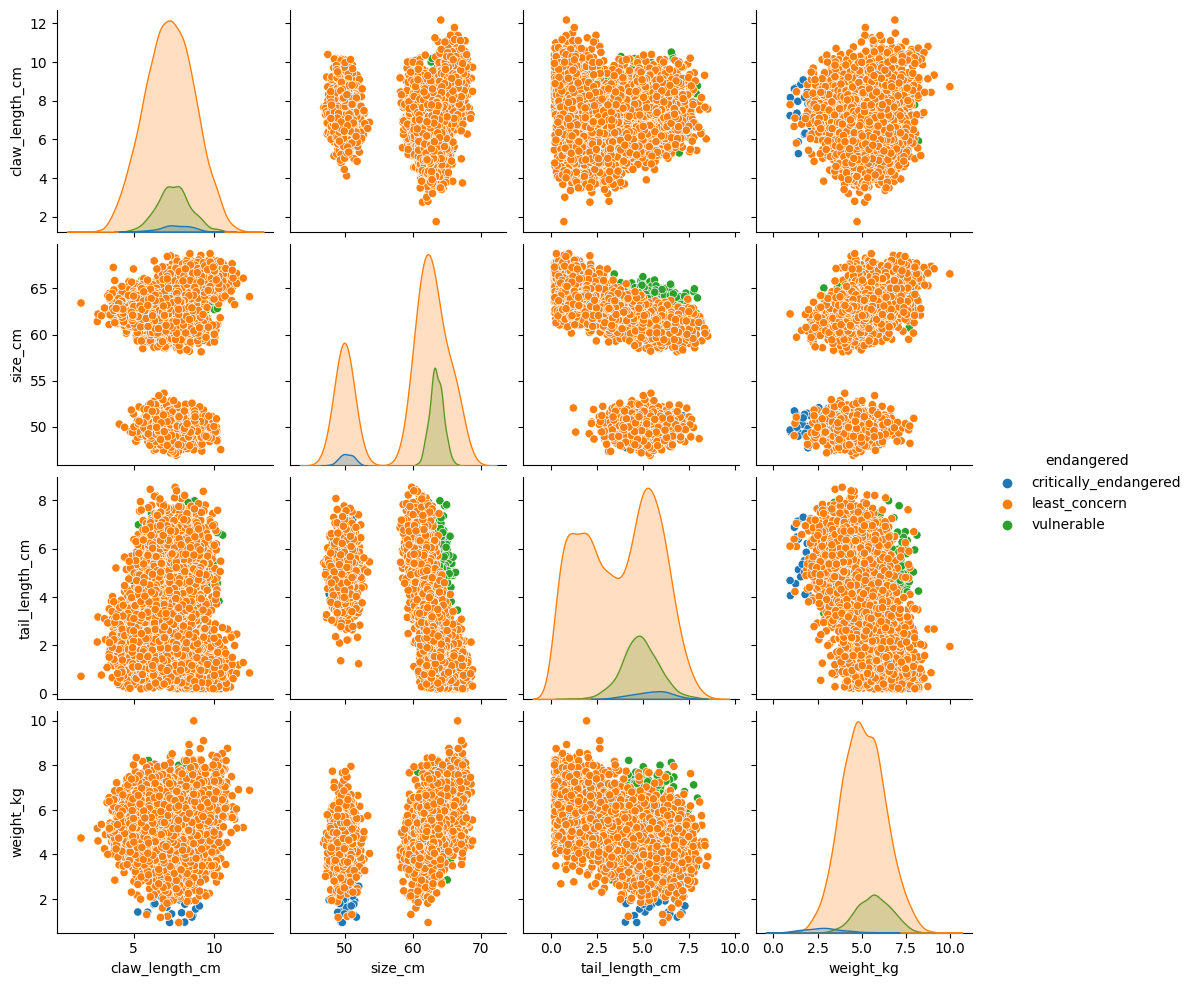

In [110]:
sns.pairplot(data =df, hue = 'endangered')